<a href="https://colab.research.google.com/github/jessicanadalete/machine_learning_trials/blob/main/ML_trial_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0.0 Imports

In [3]:
import pandas as pd
import numpy as np
from matplotlib             import pyplot as plt
from sklearn                import metrics as mt
from sklearn.neighbors      import KNeighborsClassifier
from sklearn                import tree as tr
from sklearn                import ensemble as en
from sklearn.linear_model   import LinearRegression
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeRegressor
from sklearn.ensemble       import RandomForestRegressor
from sklearn.preprocessing  import PolynomialFeatures
from sklearn                import linear_model as lm
from sklearn                import cluster      as ct

##1.0 Load Dataset

In [4]:
#classification

X_training = pd.read_csv('/content/X_training.csv')
y_training = pd.read_csv('/content/y_training.csv')
X_validation = pd.read_csv('/content/X_validation.csv')
y_validation = pd.read_csv('/content/y_validation.csv')
X_test = pd.read_csv('/content/X_test.csv')
y_test = pd.read_csv('/content/y_test.csv')

#regression data

X_training_r = pd.read_csv('/content/X_training_r.csv')
y_training_r = pd.read_csv('/content/y_training_r.csv')
X_validation_r = pd.read_csv('/content/X_validation_r.csv')
y_validation_r = pd.read_csv('/content/y_validation_r.csv')
X_test_r = pd.read_csv('/content/X_test_r.csv')
y_test_r = pd.read_csv('/content/y_test_r.csv')

#clusterization data
X_dataset_c = pd.read_csv('/content/X_dataset.csv')

#2.0 Training Models

##2.1 Classification

###2.1.1 KNN

a. KNN Model Training

In [5]:
#defining KNN model
knn_classifier = KNeighborsClassifier ()

#training KNN model
knn_classifier.fit(X_training, y_training)

#predict with data training
y_pred_knn_training= knn_classifier.predict(X_training)

#metrics data training
knn_accuracy_training = mt.accuracy_score(y_training, y_pred_knn_training)
knn_precision_training= mt.precision_score(y_training, y_pred_knn_training)
knn_recall_training = mt.recall_score(y_training, y_pred_knn_training)
knn_f1score_training = mt.f1_score(y_training, y_pred_knn_training)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


b. KNN Validation

In [6]:
#predict with data validation
y_pred_knn_validation= knn_classifier.predict(X_validation)

#metrics data validation
knn_accuracy_validation = mt.accuracy_score(y_validation, y_pred_knn_validation)
knn_precision_validation= mt.precision_score(y_validation, y_pred_knn_validation)
knn_recall_validation = mt.recall_score(y_validation, y_pred_knn_validation)
knn_f1score_validation = mt.f1_score(y_validation, y_pred_knn_validation)

c. KNN Hyperparameter Tuning

In [7]:
#finding best k
k_values = np.arange(2, 15, 1)

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [8]:
for k in k_values:

  knn_classifier = KNeighborsClassifier (n_neighbors = k) #defining model
  knn_classifier.fit(X_training, y_training) #training model

  y_pred_knn= knn_classifier.predict(X_validation) #predict with data validation

  #metrics
  knn_accuracy = mt.accuracy_score(y_validation, y_pred_knn)
  knn_precision = mt.precision_score(y_validation, y_pred_knn)
  knn_recall = mt.recall_score(y_validation, y_pred_knn)
  knn_f1score = mt.f1_score(y_validation, y_pred_knn)

  accuracy_list.append(knn_accuracy)
  precision_list.append(knn_precision)
  recall_list.append(knn_recall)
  f1_score_list.append(knn_f1score)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [9]:
#finding the maximum values and their respective k
max_accuracy = max(accuracy_list)
max_accuracy_k = k_values[accuracy_list.index(max_accuracy)]

max_precision = max(precision_list)
max_precision_k = k_values[precision_list.index(max_precision)]

max_recall = max(recall_list)
max_recall_k = k_values[recall_list.index(max_recall)]

max_f1score = max(f1_score_list)
max_f1score_k = k_values[f1_score_list.index(max_f1score)]

#printing the results
print('Max Accuracy: {} and k = {}' .format(max_accuracy, max_accuracy_k))
print('Max Precision: {} and k = {}' .format(max_precision, max_precision_k))
print('Max Recall: {} and k = {}' .format(max_recall, max_recall_k))
print('Max F1 Score: {} and k = {}' .format(max_f1score, max_f1score_k))


Max Accuracy: 0.6762765854757231 and k = 3
Max Precision: 0.6839209802450613 and k = 2
Max Recall: 0.6212784913505086 and k = 3
Max F1 Score: 0.6245475239765645 and k = 3


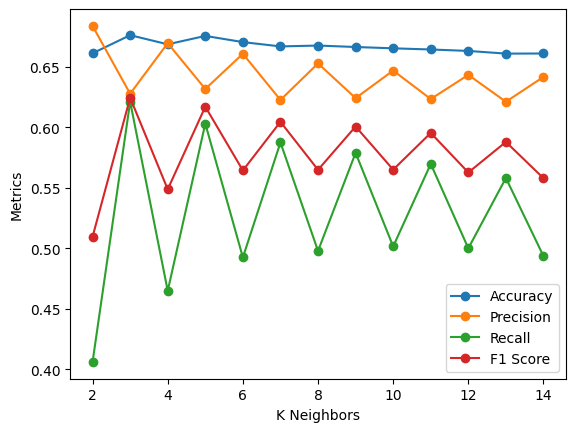

In [10]:
plt.plot(k_values, accuracy_list, marker="o", label="Accuracy")
plt.plot(k_values, precision_list, marker="o", label="Precision")
plt.plot(k_values, recall_list, marker="o", label="Recall")
plt.plot(k_values, f1_score_list, marker="o", label="F1 Score")
plt.xlabel("K Neighbors")
plt.ylabel("Metrics")
plt.legend()

c. KNN Testing

In [11]:
#defining KNN model
knn_classifier = KNeighborsClassifier (n_neighbors = 3)
knn_classifier.fit(np.concatenate((X_training, X_validation), axis=0), np.concatenate((y_training, y_validation), axis=0))

#predict with data test
y_pred_knn_test= knn_classifier.predict(X_test) #predict with data test

#metrics data test
knn_accuracy_test = mt.accuracy_score(y_test, y_pred_knn_test)
knn_precision_test = mt.precision_score(y_test, y_pred_knn_test)
knn_recall_test = mt.recall_score(y_test, y_pred_knn_test)
knn_f1score_test = mt.f1_score(y_test, y_pred_knn_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


d. KNN Metrics

In [12]:
#listing metrics to show in table

metrics_knn_training = []
metrics_knn_validation = []
metrics_knn_test = []

metrics_knn_training = [knn_accuracy_training,knn_precision_training,knn_recall_training, knn_f1score_training]
metrics_knn_validation = [knn_accuracy_validation,knn_precision_validation, knn_recall_validation, knn_f1score_validation]
metrics_knn_test = [knn_accuracy_test,knn_precision_test, knn_recall_test, knn_f1score_test]

###2.1.2 Decision Tree

a. Decision Tree Classification Model Training

In [13]:
#defining Decision Tree Classification model
tree_model = tr.DecisionTreeClassifier()

#training Decision Tree Classification model
tree_model.fit(X_training,y_training)

#predict with data training
y_pred_dt_training = tree_model.predict(X_training)

#metrics data training
dt_accuracy_training = mt.accuracy_score(y_training, y_pred_dt_training)
dt_precision_training = mt.precision_score(y_training, y_pred_dt_training)
dt_recall_training = mt.recall_score(y_training, y_pred_dt_training)
dt_f1score_training = mt.f1_score(y_training, y_pred_dt_training)

b. Decision Tree Classification Validation

In [14]:
#predict with data validation
y_pred_dt_validation = tree_model.predict(X_validation)

#metrics data validation
dt_accuracy_validation = mt.accuracy_score(y_validation, y_pred_dt_validation)
dt_precision_validation = mt.precision_score(y_validation, y_pred_dt_validation)
dt_recall_validation = mt.recall_score(y_validation, y_pred_dt_validation)
dt_f1score_validation = mt.f1_score(y_validation, y_pred_dt_validation)


c. Decision Tree Classification Hyperparameter Tuning

In [15]:
#finding best max_depth
max_depth = np.arange(1, 60, 1)

accuracy_list_dt = []
precision_list_dt = []
recall_list_dt = []
f1_score_list_dt = []

In [16]:
for i in max_depth:
  #defining Decision Tree Classification model
  tree_model = tr.DecisionTreeClassifier(max_depth = i, random_state=0)
  #training Decision Tree Classification
  tree_model.fit(X_training,y_training)

  y_pred_dt= tree_model.predict(X_validation) #predict with data validation

  #metrics
  dt_accuracy = mt.accuracy_score(y_validation, y_pred_dt)
  dt_precision = mt.precision_score(y_validation, y_pred_dt)
  dt_recall = mt.recall_score(y_validation, y_pred_dt)
  dt_f1score = mt.f1_score(y_validation, y_pred_dt)

  accuracy_list_dt.append(dt_accuracy)
  precision_list_dt.append(dt_precision)
  recall_list_dt.append(dt_recall)
  f1_score_list_dt.append(dt_f1score)

In [17]:
#finding the maximum values and their respective i
max_accuracy_dt = max(accuracy_list_dt)
max_accuracy_i = max_depth[accuracy_list_dt.index(max_accuracy_dt)]

max_precision_dt = max(precision_list_dt)
max_precision_i = max_depth[precision_list_dt.index(max_precision_dt)]

max_recall_dt = max(recall_list_dt)
max_recall_i = max_depth[recall_list_dt.index(max_recall_dt)]

max_f1score_dt = max(f1_score_list_dt)
max_f1score_i = max_depth[f1_score_list_dt.index(max_f1score_dt)]

# Printing the results
print('Max Accuracy: {} and i = {}' .format(max_accuracy_dt, max_accuracy_i))
print('Max Precision: {} and i = {}' .format(max_precision_dt, max_precision_i))
print('Max Recall: {} and i = {}' .format(max_recall_dt, max_recall_i))
print('Max F1 Score: {} and i = {}' .format(max_f1score_dt, max_f1score_i))


Max Accuracy: 0.9522828919849416 and i = 14
Max Precision: 0.958544061302682 and i = 12
Max Recall: 0.9397134159922785 and i = 25
Max F1 Score: 0.9442753541502273 and i = 14


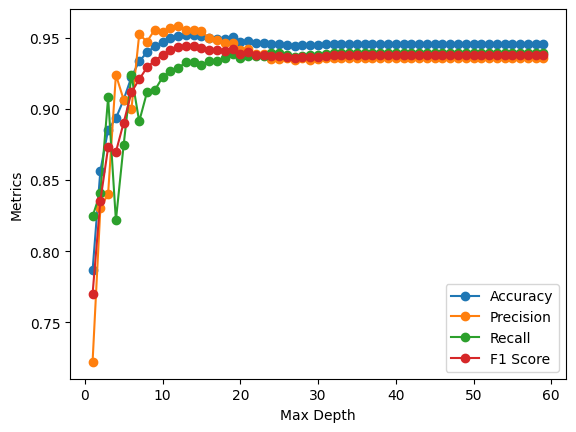

In [18]:
plt.plot(max_depth, accuracy_list_dt, marker="o", label="Accuracy")
plt.plot(max_depth, precision_list_dt, marker="o", label="Precision")
plt.plot(max_depth, recall_list_dt, marker="o", label="Recall")
plt.plot(max_depth, f1_score_list_dt, marker="o", label="F1 Score")
plt.xlabel("Max Depth")
plt.ylabel("Metrics")
plt.legend()

In [19]:
best_depth = max_depth[np.argmax(recall_list_dt)]
best_depth

25

d. Decision Tree Classification Testing

In [20]:
#defining Decision Tree Classification model
tree_model = tr.DecisionTreeClassifier(max_depth=25, random_state=0)

#training Decision Tree Classification model
tree_model.fit(np.concatenate((X_training, X_validation), axis=0), np.concatenate((y_training, y_validation), axis=0))

#predict data test
y_pred_dt_test = tree_model.predict(X_test)

#metrics data test
dt_accuracy_test = mt.accuracy_score(y_test, y_pred_dt_test)
dt_precision_test = mt.precision_score(y_test, y_pred_dt_test)
dt_recall_test = mt.recall_score(y_test, y_pred_dt_test)
dt_f1score_test = mt.f1_score(y_test, y_pred_dt_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


e. Decision Tree Classification Metrics

In [21]:
#listing metrics to show in table

metrics_dt_training = []
metrics_dt_validation = []
metrics_dt_test = []

metrics_dt_training = [dt_accuracy_training, dt_precision_training, dt_recall_training, dt_f1score_training]
metrics_dt_validation = [dt_accuracy_validation, dt_precision_validation, dt_recall_validation, dt_f1score_validation]
metrics_dt_test = [dt_accuracy_test, dt_precision_test, dt_recall_test, dt_f1score_test]

###2.1.3 Random Forest

a. Random Forest Classification Model Training

In [22]:
#defining Random Forest Classification model
random_forest_model = en.RandomForestClassifier(n_estimators=100,random_state=0)

#training Random Forest Classification model
random_forest_model.fit(X_training,y_training)

#predict data training
y_pred_rf_training = random_forest_model.predict(X_training)

#metrics data training
rf_accuracy_training = mt.accuracy_score(y_training, y_pred_rf_training)
rf_precision_training = mt.precision_score(y_training, y_pred_rf_training)
rf_recall_training = mt.recall_score(y_training, y_pred_rf_training)
rf_f1score_training = mt.f1_score(y_training, y_pred_rf_training)

<ipython-input-22-c7d1af80ad7b>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_training,y_training)


b. Random Forest Classification Validation

In [23]:
#predict data validation
y_pred_rf_validation = random_forest_model.predict(X_validation)

#metrics data validation
rf_accuracy_validation = mt.accuracy_score(y_validation, y_pred_rf_validation)
rf_precision_validation = mt.precision_score(y_validation, y_pred_rf_validation)
rf_recall_validation = mt.recall_score(y_validation, y_pred_rf_validation)
rf_f1score_validation = mt.f1_score(y_validation, y_pred_rf_validation)

c. Random Forest Classification Hyperparameter tuning

In [24]:
max_depth = np.arange(1, 60, 10)

accuracy_list_rf = []
precision_list_rf = []
recall_list_rf = []
f1_score_list_rf = []

In [25]:
for i in max_depth:
  #defining model
  random_forest_model = en.RandomForestClassifier(n_estimators = 100,random_state = 0, max_depth = i)
  #training tree_model
  random_forest_model.fit(X_training,y_training)

  y_pred_rf= random_forest_model.predict(X_validation) #predict with data validation

  #metrics
  rf_accuracy = mt.accuracy_score(y_validation, y_pred_rf)
  rf_precision = mt.precision_score(y_validation, y_pred_rf)
  rf_recall = mt.recall_score(y_validation, y_pred_rf)
  rf_f1score = mt.f1_score(y_validation, y_pred_rf)

  accuracy_list_rf.append(rf_accuracy)
  precision_list_rf.append(rf_precision)
  recall_list_rf.append(rf_recall)
  f1_score_list_rf.append(rf_f1score)

<ipython-input-25-66983fa24859>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_training,y_training)
<ipython-input-25-66983fa24859>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_training,y_training)
<ipython-input-25-66983fa24859>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_training,y_training)
<ipython-input-25-66983fa24859>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_training,y_training)
<ipython-input-25-66983fa24859>:5: DataConve

In [26]:
#finding the maximum values and their respective i
max_accuracy_rf = max(accuracy_list_rf)
max_accuracy_i = max_depth[accuracy_list_rf.index(max_accuracy_rf)]

max_precision_rf = max(precision_list_rf)
max_precision_i = max_depth[precision_list_rf.index(max_precision_rf)]

max_recall_rf = max(recall_list_rf)
max_recall_i = max_depth[recall_list_rf.index(max_recall_rf)]

max_f1score_rf = max(f1_score_list_rf)
max_f1score_i = max_depth[f1_score_list_rf.index(max_f1score_rf)]

# Printing the results
print('Max Accuracy: {} and i = {}' .format(max_accuracy_rf, max_accuracy_i))
print('Max Precision: {} and i = {}' .format(max_precision_rf, max_precision_i))
print('Max Recall: {} and i = {}' .format(max_recall_rf, max_recall_i))
print('Max F1 Score: {} and i = {}' .format(max_f1score_rf, max_f1score_i))


Max Accuracy: 0.964702854017182 and i = 31
Max Precision: 0.9742410303587856 and i = 31
Max Recall: 0.943796866879501 and i = 21
Max F1 Score: 0.9586240712103496 and i = 31


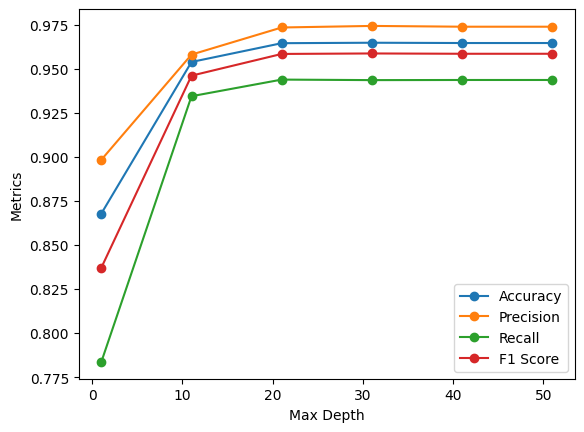

In [27]:
plt.plot(max_depth, accuracy_list_rf, marker="o", label="Accuracy")
plt.plot(max_depth, precision_list_rf, marker="o", label="Precision")
plt.plot(max_depth, recall_list_rf, marker="o", label="Recall")
plt.plot(max_depth, f1_score_list_rf, marker="o", label="F1 Score")
plt.xlabel("Max Depth")
plt.ylabel("Metrics")
plt.legend()

c. Random Forest Classification Testing

In [28]:
#defining Random Forest Classification model
random_forest_model = en.RandomForestClassifier(n_estimators = 100, max_depth=31, random_state=0)

#training Random Forest Classification model
random_forest_model.fit(np.concatenate((X_training, X_validation), axis=0), np.concatenate((y_training, y_validation), axis=0))

#predict with data test
y_pred_rf_test = random_forest_model.predict(X_test)

#metrics data test
rf_accuracy_test = mt.accuracy_score(y_test, y_pred_rf_test)
rf_precision_test = mt.precision_score(y_test, y_pred_rf_test)
rf_recall_test = mt.recall_score(y_test, y_pred_rf_test)
rf_f1score_test = mt.f1_score(y_test, y_pred_rf_test)

<ipython-input-28-b8864491d65a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(np.concatenate((X_training, X_validation), axis=0), np.concatenate((y_training, y_validation), axis=0))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


c. Random Forest Classification Metrics

In [29]:
#listing metrics to show in table

metrics_rf_training = []
metrics_rf_validation = []
metrics_rf_test = []

metrics_rf_training = [rf_accuracy_training, rf_precision_training, rf_recall_training, rf_f1score_training]
metrics_rf_validation = [rf_accuracy_validation, rf_precision_validation, rf_recall_validation, rf_f1score_validation]
metrics_rf_test = [rf_accuracy_test, rf_precision_test, rf_recall_test, rf_f1score_test]

###2.1.4 Logistic Regression

a. Logistic Regression Model Training

In [30]:
#defining Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=0)

#training Logistic Regression model
logistic_regression_model.fit(X_training,y_training)

#predict with data training
y_pred_lgr_training = logistic_regression_model.predict(X_training)

#metrics data training
lgr_accuracy_training = mt.accuracy_score(y_training, y_pred_lgr_training)
lgr_precision_training = mt.precision_score(y_training, y_pred_lgr_training)
lgr_recall_training = mt.recall_score(y_training, y_pred_lgr_training)
lgr_f1score_training = mt.f1_score(y_training, y_pred_lgr_training)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


b. Logistic Regression Model Validation

In [31]:
#predict data validation
y_pred_lgr_validation = logistic_regression_model.predict(X_validation)

#metrics data validation
lgr_accuracy_validation = mt.accuracy_score(y_validation, y_pred_lgr_validation)
lgr_precision_validation = mt.precision_score(y_validation, y_pred_lgr_validation)
lgr_recall_validation = mt.recall_score(y_validation, y_pred_lgr_validation)
lgr_f1score_validation = mt.f1_score(y_validation, y_pred_lgr_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c. Logistic Regression Model Hyperparameter tuning

In [32]:
C = np.arange(0.1, 1.0, 0.1)

accuracy_list_lgrC = []
precision_list_lgrC = []
recall_list_lgrC = []
f1_score_list_lgrC = []

In [33]:
for i in C:
  #defining Logistic Regression model
  logistic_regression_model = LogisticRegression(random_state=0, C=i)

  #training Logistic Regression model
  logistic_regression_model.fit(X_training,y_training)

  #predict
  y_pred_lgrC= logistic_regression_model.predict(X_validation)

  #metrics
  lgrC_accuracy = mt.accuracy_score(y_validation, y_pred_lgrC)
  lgrC_precision = mt.precision_score(y_validation, y_pred_lgrC)
  lgrC_recall = mt.recall_score(y_validation, y_pred_lgrC)
  lgrC_f1score = mt.f1_score(y_validation, y_pred_lgrC)

  accuracy_list_lgrC.append(lgrC_accuracy)
  precision_list_lgrC.append(lgrC_precision)
  recall_list_lgrC.append(lgrC_recall)
  f1_score_list_lgrC.append(lgrC_f1score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use

In [34]:
#finding the maximum values and their respective i
max_accuracy_lgrC = max(accuracy_list_lgrC)
max_accuracy_i = max_depth[accuracy_list_lgrC.index(max_accuracy_lgrC)]

max_precision_lgrC = max(precision_list_lgrC)
max_precision_i = max_depth[precision_list_lgrC.index(max_precision_lgrC)]

max_recall_lgrC = max(recall_list_lgrC)
max_recall_i = max_depth[recall_list_lgrC.index(max_recall_lgrC)]

max_f1score_lgrC = max(f1_score_list_lgrC)
max_f1score_i = max_depth[f1_score_list_lgrC.index(max_f1score_lgrC)]

# Printing the results
print('Max Accuracy: {} and i = {}' .format(max_accuracy_lgrC, max_accuracy_i))
print('Max Precision: {} and i = {}' .format(max_precision_lgrC, max_precision_i))
print('Max Recall: {} and i = {}' .format(max_recall_lgrC, max_recall_i))
print('Max F1 Score: {} and i = {}' .format(max_f1score_lgrC, max_f1score_i))


Max Accuracy: 0.5666205476366678 and i = 1
Max Precision: 0.0 and i = 1
Max Recall: 0.0 and i = 1
Max F1 Score: 0.0 and i = 1


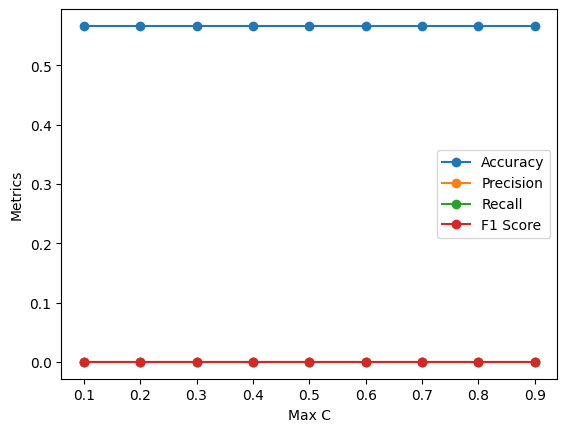

In [35]:
plt.plot(C, accuracy_list_lgrC, marker="o", label="Accuracy")
plt.plot(C, precision_list_lgrC, marker="o", label="Precision")
plt.plot(C, recall_list_lgrC, marker="o", label="Recall")
plt.plot(C, f1_score_list_lgrC, marker="o", label="F1 Score")
plt.xlabel("Max C")
plt.ylabel("Metrics")
plt.legend()

In [36]:
solver = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

accuracy_list_lgrsolver = []
precision_list_lgrsolver = []
recall_list_lgrsolver = []
f1_score_list_lgrsolver = []

In [37]:
for i in solver:
  #defining model
  logistic_regression_model = LogisticRegression(random_state=0, C=1.0, solver=i)

  #training model
  logistic_regression_model.fit(X_training,y_training)

  #predict with data validation
  y_pred_lgrsolver= logistic_regression_model.predict(X_validation)

  #metrics
  lgrsolver_accuracy = mt.accuracy_score(y_validation, y_pred_lgrsolver)
  lgrsolver_precision = mt.precision_score(y_validation, y_pred_lgrsolver)
  lgrsolver_recall = mt.recall_score(y_validation, y_pred_lgrsolver)
  lgrsolver_f1score = mt.f1_score(y_validation, y_pred_lgrsolver)

  accuracy_list_lgrsolver.append(lgrsolver_accuracy)
  precision_list_lgrsolver.append(lgrsolver_precision)
  recall_list_lgrsolver.append(lgrsolver_recall)
  f1_score_list_lgrsolver.append(lgrsolver_f1score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

In [38]:
#finding the maximum values and their respective i
max_accuracy_lgrsolver = max(accuracy_list_lgrsolver)
max_accuracy_i = solver[accuracy_list_lgrsolver.index(max_accuracy_lgrsolver)]

max_precision_lgrsolver = max(precision_list_lgrsolver)
max_precision_i = solver[precision_list_lgrsolver.index(max_precision_lgrsolver)]

max_recall_lgrsolver = max(recall_list_lgrsolver)
max_recall_i = solver[recall_list_lgrsolver.index(max_recall_lgrsolver)]

max_f1score_lgrsolver = max(f1_score_list_lgrsolver)
max_f1score_i = solver[f1_score_list_lgrsolver.index(max_f1score_lgrsolver)]

# Printing the results
print('Max Accuracy: {} and i = {}' .format(max_accuracy_lgrsolver, max_accuracy_i))
print('Max Precision: {} and i = {}' .format(max_precision_lgrsolver, max_precision_i))
print('Max Recall: {} and i = {}' .format(max_recall_lgrsolver, max_recall_i))
print('Max F1 Score: {} and i = {}' .format(max_f1score_lgrsolver, max_f1score_i))

Max Accuracy: 0.8743846327101902 and i = newton-cholesky
Max Precision: 0.8692765037448845 and i = newton-cholesky
Max Recall: 0.8358452743336551 and i = newton-cholesky
Max F1 Score: 0.8522331566994702 and i = newton-cholesky


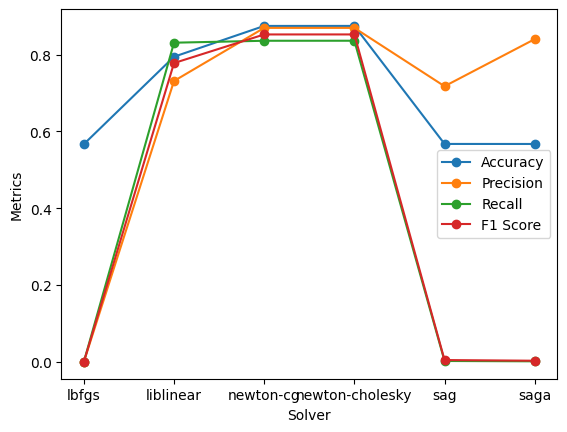

In [39]:
plt.plot(solver, accuracy_list_lgrsolver, marker="o", label="Accuracy")
plt.plot(solver, precision_list_lgrsolver, marker="o", label="Precision")
plt.plot(solver, recall_list_lgrsolver, marker="o", label="Recall")
plt.plot(solver, f1_score_list_lgrsolver, marker="o", label="F1 Score")
plt.xlabel("Solver")
plt.ylabel("Metrics")
plt.legend()

d. Logistic Regression Model Testing

In [40]:
#defining Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=0, C=1.0, solver = 'newton-cholesky')

#training Logistic Regression model
logistic_regression_model.fit(np.concatenate((X_training, X_validation), axis=0), np.concatenate((y_training, y_validation), axis=0))

#predict data test
y_pred_lgr_test = logistic_regression_model.predict(X_test)

#metrics
lgr_accuracy_test = mt.accuracy_score(y_test, y_pred_lgr_test)
lgr_precision_test = mt.precision_score(y_test, y_pred_lgr_test)
lgr_recall_test = mt.recall_score(y_test, y_pred_lgr_test)
lgr_f1score_test = mt.f1_score(y_test, y_pred_lgr_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


e. Logistic Regression Model Metrics

In [41]:
#listing metrics to show in table

metrics_lgr_training = []
metrics_lgr_validation = []
metrics_lgr_test = []

metrics_lgr_training = [lgr_accuracy_training, lgr_precision_training, lgr_recall_training, lgr_f1score_training]
metrics_lgr_validation = [lgr_accuracy_validation, lgr_precision_validation, lgr_recall_validation, lgr_f1score_validation]
metrics_lgr_test = [lgr_accuracy_test, lgr_precision_test, lgr_recall_test, lgr_f1score_test]

##2.2 Regression

###2.2.1 Linear Regression

a. Linear Regression Model Training



In [42]:
#defining Liner Regression model
linear_regression_model = LinearRegression()

#training Liner Regression model
linear_regression_model.fit(X_training_r,y_training_r)

#predict data training
y_pred_lnr_training = linear_regression_model.predict(X_training_r)

#metrics data training
lnr_r2_training = mt.r2_score(y_training_r, y_pred_lnr_training)
lnr_mse_training = mt.mean_squared_error(y_training_r, y_pred_lnr_training)
lnr_rmse_training = np.sqrt(lnr_mse_training)
lnr_mae_training = mt.mean_absolute_error(y_training_r, y_pred_lnr_training)
lnr_mape_training = mt.mean_absolute_percentage_error(y_training_r, y_pred_lnr_training)

b. Linear Regression Validation


In [43]:
#predict data validation
y_pred_lnr_validation = linear_regression_model.predict(X_validation_r)

#metrics data validation
lnr_r2_validation = mt.r2_score(y_validation_r, y_pred_lnr_validation)
lnr_mse_validation = mt.mean_squared_error(y_validation_r, y_pred_lnr_validation)
lnr_rmse_validation = np.sqrt(lnr_mse_validation)
lnr_mae_validation = mt.mean_absolute_error(y_validation_r, y_pred_lnr_validation)
lnr_mape_validation = mt.mean_absolute_percentage_error(y_validation_r, y_pred_lnr_validation)

c. Linear Regression Testing

In [44]:
#training Linear Regression model
linear_regression_model.fit(np.concatenate((X_training_r, X_validation_r), axis=0), np.concatenate((y_training_r, y_validation_r), axis=0))

#predict data test
y_pred_lnr_test = linear_regression_model.predict(X_test_r)

#metrics
lnr_r2_test = mt.r2_score(y_test_r, y_pred_lnr_test)
lnr_mse_test = mt.mean_squared_error(y_test_r, y_pred_lnr_test)
lnr_rmse_test = np.sqrt(lnr_mse_test)
lnr_mae_test = mt.mean_absolute_error(y_test_r, y_pred_lnr_test)
lnr_mape_test = mt.mean_absolute_percentage_error(y_test_r, y_pred_lnr_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


c. Linear Regression Metrics

In [45]:
#listing metrics to show in table

metrics_lnr_training = []
metrics_lnr_validation = []
metrics_lnr_test = []

metrics_lnr_training = [lnr_r2_training,lnr_mse_training,lnr_rmse_training, lnr_mae_training, lnr_mape_training]
metrics_lnr_validation = [lnr_r2_validation,lnr_mse_validation, lnr_rmse_validation, lnr_mae_validation, lnr_mape_validation]
metrics_lnr_test = [lnr_r2_test,lnr_mse_test, lnr_rmse_test, lnr_mae_test, lnr_mape_test]

###2.2.2 Decision Tree Regression

a. Decision Tree Regression Model Training

In [168]:
#defining Decision Tree Regression model
tree_regressor_model = tr.DecisionTreeRegressor()

#training Decision Tree Regression model
tree_regressor_model.fit(X_training_r,y_training_r)

#predict data training
y_pred_dtr_training = tree_regressor_model.predict(X_training_r)

#metrics data training
dtr_r2_training = mt.r2_score(y_training_r, y_pred_dtr_training)
dtr_mse_training = mt.mean_squared_error(y_training_r, y_pred_dtr_training)
dtr_rmse_training = np.sqrt(dtr_mse_training)
dtr_mae_training = mt.mean_absolute_error(y_training_r, y_pred_dtr_training)
dtr_mape_training = mt.mean_absolute_percentage_error(y_training_r, y_pred_dtr_training)

b. Decision Tree Regression Validation

In [169]:
#predict data validation
y_pred_dtr_validation = tree_regressor_model.predict(X_validation_r)

#metrics data validation
dtr_r2_validation = mt.r2_score(y_validation_r, y_pred_dtr_validation)
dtr_mse_validation = mt.mean_squared_error(y_validation_r, y_pred_dtr_validation)
dtr_rmse_validation = np.sqrt(dtr_mse_validation)
dtr_mae_validation = mt.mean_absolute_error(y_validation_r, y_pred_dtr_validation)
dtr_mape_validation = mt.mean_absolute_percentage_error(y_validation_r, y_pred_dtr_validation)


c. Decision Tree Regression Hyperparameter Tuning

In [170]:
#finding best max_depth
max_depth = np.arange(1, 60, 1)

r2_list_dtr = []
mse_list_dtr = []
rmse_list_dtr = []
mae_list_dtr = []
mape_list_dtr = []

In [49]:
for i in max_depth:

  #defining model
  tree_regressor_model = tr.DecisionTreeRegressor(max_depth = i, random_state=0)

  #training tree_regressor_model
  tree_regressor_model.fit(X_training_r,y_training_r)

  y_pred_dtr= tree_regressor_model.predict(X_validation_r) #predict with data validation

  #metrics
  dtr_r2= mt.r2_score(y_validation_r, y_pred_dtr)
  dtr_mse= mt.mean_squared_error(y_validation_r, y_pred_dtr)
  dtr_rmse= np.sqrt(dtr_mse)
  dtr_mae= mt.mean_absolute_error(y_validation_r, y_pred_dtr)
  dtr_mape= mt.mean_absolute_percentage_error(y_validation_r, y_pred_dtr)

  r2_list_dtr.append(dtr_r2)
  mse_list_dtr.append(dtr_mse)
  rmse_list_dtr.append(dtr_rmse)
  mae_list_dtr.append(dtr_mae)
  mape_list_dtr.append(dtr_mape)

In [50]:
# Finding the minimum values and their respective i
min_r2_dtr = min(r2_list_dtr)
min_r2_i = max_depth[r2_list_dtr.index(min_r2_dtr)]

min_mse_dtr = min(mse_list_dtr)
min_mse_i = max_depth[mse_list_dtr.index(min_mse_dtr)]

min_rmse_dtr = min(rmse_list_dtr)
min_rmse_i = max_depth[rmse_list_dtr.index(min_rmse_dtr)]

min_mae_dtr = min(mae_list_dtr)
min_mae_i = max_depth[mae_list_dtr.index(min_mae_dtr)]

min_mape_dtr = min(mape_list_dtr)
min_mape_i = max_depth[mape_list_dtr.index(min_mape_dtr)]

# Printing the results
print('min R2: {} and i = {}' .format(min_r2_dtr, min_r2_i))
print('min MSE: {} and i = {}' .format(min_mse_dtr, min_mse_i))
print('min RMSE: {} and i = {}' .format(min_rmse_dtr, min_rmse_i))
print('min MAE: {} and i = {}' .format(min_mae_dtr, min_mae_i))
print('min MAPE: {} and i = {}' .format(min_mae_dtr, min_mae_i))


min R2: -0.3084886737255812 and i = 26
min MSE: 447.1613187611445 and i = 5
min RMSE: 21.146189225511637 and i = 5
min MAE: 16.739333173248106 and i = 7
min MAPE: 16.739333173248106 and i = 7


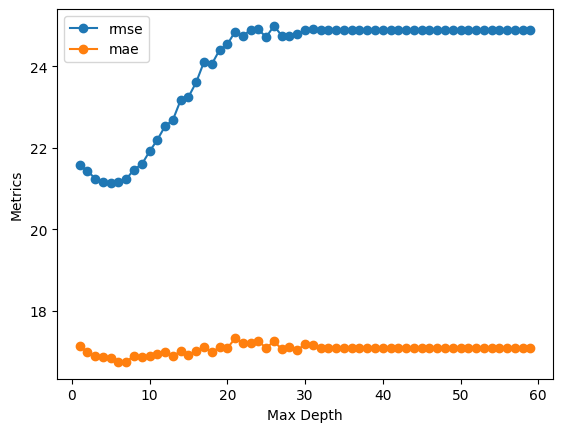

In [51]:
plt.plot(max_depth, rmse_list_dtr, marker="o", label="rmse")
plt.plot(max_depth, mae_list_dtr, marker="o", label="mae")

plt.xlabel("Max Depth")
plt.ylabel("Metrics")
plt.legend()

In [52]:
best_depth_dtr = max_depth[np.argmin(rmse_list_dtr)]
best_depth_dtr

5

c. Decision Tree Regression Testing

In [53]:
#defining Decision Tree Regression model
tree_regressor_model = tr.DecisionTreeRegressor(max_depth = 5, random_state=0)

#training Decision Tree Regression model
tree_regressor_model.fit(np.concatenate((X_training_r, X_validation_r), axis=0), np.concatenate((y_training_r, y_validation_r), axis=0))

#predict with data test
y_pred_dtr_test = tree_regressor_model.predict(X_test_r)

#metrics data test
dtr_r2_test = mt.r2_score(y_test_r, y_pred_dtr_test)
dtr_mse_test = mt.mean_squared_error(y_test_r, y_pred_dtr_test)
dtr_rmse_test = np.sqrt(dtr_mse)
dtr_mae_test = mt.mean_absolute_error(y_test_r, y_pred_dtr_test)
dtr_mape_test = mt.mean_absolute_percentage_error(y_test_r, y_pred_dtr_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


d. Decision Tree Regression Metrics

In [54]:
#listing metrics to show in table

metrics_dtr_training = []
metrics_dtr_validation = []
metrics_dtr_test = []

#listing metrics to show in table
metrics_dtr_training = [dtr_r2_training,dtr_mse_training,dtr_rmse_training, dtr_mae_training, dtr_mape_training]
metrics_dtr_validation = [dtr_r2_validation,dtr_mse_validation, dtr_rmse_validation, dtr_mae_validation, dtr_mape_validation]
metrics_dtr_test = [dtr_r2_test,dtr_mse_test, dtr_rmse_test, dtr_mae_test, dtr_mape_test]

###2.2.3 Random Forest Regression

a. Random Forest Regression Model Training

In [55]:
#defining Random Forest Regression model
rf_regressor_model = en.RandomForestRegressor(n_estimators = 100, random_state=0)

#training Random Forest Regression model
rf_regressor_model.fit(X_training_r,y_training_r)

#predict data training
y_pred_rfr_training = rf_regressor_model.predict(X_training_r)

#metrics data training
rfr_r2_training = mt.r2_score(y_training_r, y_pred_rfr_training)
rfr_mse_training = mt.mean_squared_error(y_training_r, y_pred_rfr_training)
rfr_rmse_training = np.sqrt(rfr_mse_training)
rfr_mae_training = mt.mean_absolute_error(y_training_r, y_pred_rfr_training)
rfr_mape_training = mt.mean_absolute_percentage_error(y_training_r, y_pred_rfr_training)

<ipython-input-55-2035498d7850>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor_model.fit(X_training_r,y_training_r)


b. Random Forest Regression Validation

In [56]:
#predict data validation
y_pred_rfr_validation = rf_regressor_model.predict(X_validation_r)

#metrics data validation
rfr_r2_validation = mt.r2_score(y_validation_r, y_pred_rfr_validation)
rfr_mse_validation = mt.mean_squared_error(y_validation_r, y_pred_rfr_validation)
rfr_rmse_validation = np.sqrt(rfr_mse_validation)
rfr_mae_validation = mt.mean_absolute_error(y_validation_r, y_pred_rfr_validation)
rfr_mape_validation = mt.mean_absolute_percentage_error(y_validation_r, y_pred_rfr_validation)


c. Random Forest Regression Hyperparameter Tuning

In [57]:
#finding best max_depth
max_depth = np.arange(10, 100, 10)

r2_list_rfr = []
mse_list_rfr = []
rmse_list_rfr = []
mae_list_rfr = []
mape_list_rfr = []

In [58]:
for i in max_depth:

  #defining model
  rf_regressor_model = en.RandomForestRegressor(n_estimators=100, max_depth = i, random_state=0)

  #training model
  rf_regressor_model.fit(X_training_r,y_training_r)

  #predict with data validation
  y_pred_rfr= rf_regressor_model.predict(X_validation_r)

  #metrics
  rfr_r2= mt.r2_score(y_validation_r, y_pred_rfr)
  rfr_mse= mt.mean_squared_error(y_validation_r, y_pred_rfr)
  rfr_rmse= np.sqrt(rfr_mse)
  rfr_mae= mt.mean_absolute_error(y_validation_r, y_pred_rfr)
  rfr_mape= mt.mean_absolute_percentage_error(y_validation_r, y_pred_rfr)

  r2_list_rfr.append(rfr_r2)
  mse_list_rfr.append(rfr_mse)
  rmse_list_rfr.append(rfr_rmse)
  mae_list_rfr.append(rfr_mae)
  mape_list_rfr.append(rfr_mape)

<ipython-input-58-eacfedc9e584>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor_model.fit(X_training_r,y_training_r)
<ipython-input-58-eacfedc9e584>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor_model.fit(X_training_r,y_training_r)
<ipython-input-58-eacfedc9e584>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor_model.fit(X_training_r,y_training_r)
<ipython-input-58-eacfedc9e584>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor_model.fit(X_training_r,y_training_r)
<ipython-input-58-eacfedc9e584>:

In [59]:
#finding the minimum values and their respective i
min_r2_rfr = min(r2_list_rfr)
min_r2_i = max_depth[r2_list_rfr.index(min_r2_rfr)]

min_mse_rfr = min(mse_list_rfr)
min_mse_i = max_depth[mse_list_rfr.index(min_mse_rfr)]

min_rmse_rfr = min(rmse_list_rfr)
min_rmse_i = max_depth[rmse_list_rfr.index(min_rmse_rfr)]

min_mae_rfr = min(mae_list_rfr)
min_mae_i = max_depth[mae_list_rfr.index(min_mae_rfr)]

min_mape_rfr = min(mape_list_rfr)
min_mape_i = max_depth[mape_list_rfr.index(min_mape_rfr)]

# Printing the results
print('min R2: {} and i = {}' .format(min_r2_rfr, min_r2_i))
print('min MSE: {} and i = {}' .format(min_mse_rfr, min_mse_i))
print('min RMSE: {} and i = {}' .format(min_rmse_rfr, min_rmse_i))
print('min MAE: {} and i = {}' .format(min_mae_rfr, min_mae_i))
print('min MAPE: {} and i = {}' .format(min_mae_rfr, min_mae_i))


min R2: 0.21290186024326407 and i = 10
min MSE: 317.4739090380394 and i = 40
min RMSE: 17.817797536116505 and i = 40
min MAE: 13.002222942656154 and i = 50
min MAPE: 13.002222942656154 and i = 50


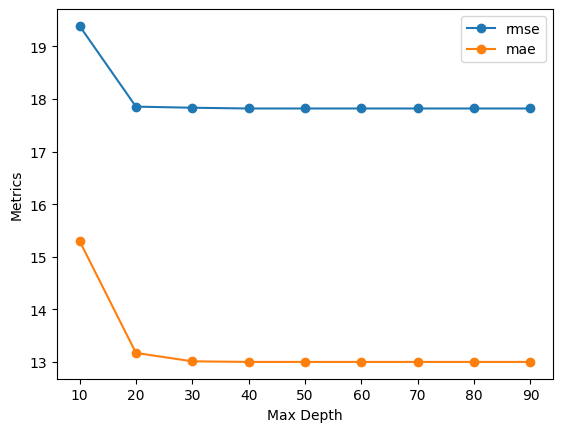

In [60]:
plt.plot(max_depth, rmse_list_rfr, marker="o", label="rmse")
plt.plot(max_depth, mae_list_rfr, marker="o", label="mae")

plt.xlabel("Max Depth")
plt.ylabel("Metrics")
plt.legend()

In [61]:
best_depth_rfr = max_depth[np.argmin(rmse_list_rfr)]
best_depth_rfr

40

c. Random Forest Regression Testing

In [62]:
#defining Random Forest Regression model
rf_regressor_model = en.RandomForestRegressor(n_estimators=100, max_depth = 40, random_state=0)

#training Random Forest Regression model
rf_regressor_model.fit(np.concatenate((X_training_r, X_validation_r), axis=0), np.concatenate((y_training_r, y_validation_r), axis=0))

#predict with data test
y_pred_rfr_test = rf_regressor_model.predict(X_test_r)

#metrics data test
rfr_r2_test = mt.r2_score(y_test_r, y_pred_rfr_test)
rfr_mse_test = mt.mean_squared_error(y_test_r, y_pred_rfr_test)
rfr_rmse_test = np.sqrt(rfr_mse)
rfr_mae_test = mt.mean_absolute_error(y_test_r, y_pred_rfr_test)
rfr_mape_test = mt.mean_absolute_percentage_error(y_test_r, y_pred_rfr_test)

<ipython-input-62-229dd0f0ecb2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor_model.fit(np.concatenate((X_training_r, X_validation_r), axis=0), np.concatenate((y_training_r, y_validation_r), axis=0))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


e. Random Forest Regression Metrics

In [63]:
#listing metrics to show in table

metrics_rfr_training = []
metrics_rfr_validation = []
metrics_rfr_test = []

#listing metrics to show in table
metrics_rfr_training = [rfr_r2_training,rfr_mse_training,rfr_rmse_training, rfr_mae_training, rfr_mape_training]
metrics_rfr_validation = [rfr_r2_validation,rfr_mse_validation, rfr_rmse_validation, rfr_mae_validation, rfr_mape_validation]
metrics_rfr_test = [rfr_r2_test,rfr_mse_test, rfr_rmse_test, rfr_mae_test, rfr_mape_test]

###2.2.4 Polynomial Regression

a. Polynomial Regression Model Training

In [64]:
#defining Polynomial Regression model
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features_training = poly.fit_transform(X_training_r)
poly_features_validation = poly.fit_transform(X_validation_r)
poly_features_test = poly.fit_transform(X_test_r)

polynomial_regression_model = LinearRegression()

#training the polynomial model
polynomial_regression_model.fit(poly_features_training, y_training_r)

#predict data training
y_pred_rpoly_training = polynomial_regression_model.predict(poly_features_training)

#metrics data training
rpoly_r2_training = mt.r2_score(y_training_r, y_pred_rpoly_training)
rpoly_mse_training = mt.mean_squared_error(y_training_r, y_pred_rpoly_training)
rpoly_rmse_training = np.sqrt(rpoly_mse_training)
rpoly_mae_training = mt.mean_absolute_error(y_training_r, y_pred_rpoly_training)
rpoly_mape_training = mt.mean_absolute_percentage_error(y_training_r, y_pred_rpoly_training)

b. Polynomial Regression Validation

In [65]:
#predict data validation
y_pred_rpoly_validation = polynomial_regression_model.predict(poly_features_validation)

#metrics data validation
rpoly_r2_validation = mt.r2_score(y_validation_r, y_pred_rpoly_validation)
rpoly_mse_validation = mt.mean_squared_error(y_validation_r, y_pred_rpoly_validation)
rpoly_rmse_validation = np.sqrt(rpoly_mse_validation)
rpoly_mae_validation = mt.mean_absolute_error(y_validation_r, y_pred_rpoly_validation)
rpoly_mape_validation = mt.mean_absolute_percentage_error(y_validation_r, y_pred_rpoly_validation)

c. Polynomial Regression Hyperparameter Tuning

In [66]:
#finding best degree
n_degree = np.arange(2, 10, 1)

r2_list_rpoly = []
mse_list_rpoly = []
rmse_list_rpoly = []
mae_list_rpoly = []
mape_list_rpoly = []

In [67]:
#defining Polynomial Regression model

for n in n_degree:
  poly = PolynomialFeatures(degree=n, include_bias=False)
  polynomial_regression_model = LinearRegression()

  #training Polynomial Regression model
  polynomial_regression_model.fit(poly_features_training, y_training_r)

  #predict data validation
  y_pred_rpoly= polynomial_regression_model.predict(poly_features_validation)

  #metrics
  rpoly_r2= mt.r2_score(y_validation_r, y_pred_rpoly)
  rpoly_mse= mt.mean_squared_error(y_validation_r, y_pred_rpoly)
  rpoly_rmse= np.sqrt(rpoly_mse)
  rpoly_mae= mt.mean_absolute_error(y_validation_r, y_pred_rpoly)
  rpoly_mape= mt.mean_absolute_percentage_error(y_validation_r, y_pred_rpoly)

  r2_list_rpoly.append(rpoly_r2)
  mse_list_rpoly.append(rpoly_mse)
  rmse_list_rpoly.append(rpoly_rmse)
  mae_list_rpoly.append(rpoly_mae)
  mape_list_rpoly.append(rpoly_mape)

In [68]:
#finding the minimum values and their respective n
min_r2_rpoly = min(r2_list_rpoly)
min_r2_n = n_degree[r2_list_rpoly.index(min_r2_rpoly)]

min_mse_rpoly = min(mse_list_rpoly)
min_mse_n = n_degree[mse_list_rpoly.index(min_mse_rpoly)]

min_rmse_rpoly = min(rmse_list_rpoly)
min_rmse_n = n_degree[rmse_list_rpoly.index(min_rmse_rpoly)]

min_mae_rpoly = min(mae_list_rpoly)
min_mae_n = n_degree[mae_list_rpoly.index(min_mae_rpoly)]

min_mape_rpoly = min(mape_list_rpoly)
min_mape_n = n_degree[mape_list_rpoly.index(min_mape_rpoly)]

# Printing the results
print('min R2: {} and n = {}' .format(min_r2_rpoly, min_r2_n))
print('min MSE: {} and n = {}' .format(min_mse_rpoly, min_mse_n))
print('min RMSE: {} and n = {}' .format(min_rmse_rpoly, min_rmse_n))
print('min MAE: {} and n = {}' .format(min_mae_rpoly, min_mae_n))
print('min MAPE: {} and n = {}' .format(min_mae_rpoly, min_mae_n))

min R2: 0.06647668389711614 and n = 2
min MSE: 445.76822347127563 and n = 2
min RMSE: 21.113223900467585 and n = 2
min MAE: 16.74993909048403 and n = 2
min MAPE: 16.74993909048403 and n = 2


d. Polynomial Regression Testing

In [69]:
#defining Polynomial Regression model
poly = PolynomialFeatures(degree=2, include_bias=False)
polynomial_regression_model = LinearRegression()

#training Polynomial Regression model
polynomial_regression_model.fit(np.concatenate((poly_features_training, poly_features_validation), axis=0), np.concatenate((y_training_r, y_validation_r), axis=0))

#predict with data test
y_pred_rpoly_test = polynomial_regression_model.predict(poly_features_test)

#metrics data test
rpoly_r2_test = mt.r2_score(y_test_r, y_pred_rpoly_test)
rpoly_mse_test = mt.mean_squared_error(y_test_r, y_pred_rpoly_test)
rpoly_rmse_test = np.sqrt(rpoly_mse_test)
rpoly_mae_test = mt.mean_absolute_error(y_test_r, y_pred_rpoly_test)
rpoly_mape_test = mt.mean_absolute_percentage_error(y_test_r, y_pred_rpoly_test)

e. Polynomial Regression Metrics

In [70]:
#listing metrics to show in table

metrics_rpoly_training = []
metrics_rpoly_validation = []
metrics_rpoly_test = []

#listing metrics to show in table
metrics_rpoly_training = [rpoly_r2_training,rpoly_mse_training,rpoly_rmse_training, rpoly_mae_training, rpoly_mape_training]
metrics_rpoly_validation = [rpoly_r2_validation,rpoly_mse_validation, rpoly_rmse_validation, rpoly_mae_validation, rpoly_mape_validation]
metrics_rpoly_test = [rpoly_r2_test,rpoly_mse_test, rpoly_rmse_test, rpoly_mae_test, rpoly_mape_test]

###2.2.5 Linear Regression Lasso

a. Linear Regression Lasso Model Training

In [71]:
#defining Linear Regression Lasso model
lnr_lasso_model = lm.Lasso()

#training Linear Regression Lasso model
lnr_lasso_model.fit(X_training_r,y_training_r)

#predict data training
y_pred_lnr_lasso_training = lnr_lasso_model.predict(X_training_r)

#metrics data training
lnr_lasso_r2_training = mt.r2_score(y_training_r, y_pred_lnr_lasso_training)
lnr_lasso_mse_training = mt.mean_squared_error(y_training_r, y_pred_lnr_lasso_training)
lnr_lasso_rmse_training = np.sqrt(lnr_lasso_mse_training)
lnr_lasso_mae_training = mt.mean_absolute_error(y_training_r, y_pred_lnr_lasso_training)
lnr_lasso_mape_training = mt.mean_absolute_percentage_error(y_training_r, y_pred_lnr_lasso_training)

b. Linear Regression Lasso Validation


In [72]:
#predict data validation
y_pred_lnr_lasso_validation = lnr_lasso_model.predict(X_validation_r)

#metrics data validation
lnr_lasso_r2_validation = mt.r2_score(y_validation_r, y_pred_lnr_lasso_validation)
lnr_lasso_mse_validation = mt.mean_squared_error(y_validation_r, y_pred_lnr_lasso_validation)
lnr_lasso_rmse_validation = np.sqrt(lnr_lasso_mse_validation)
lnr_lasso_mae_validation = mt.mean_absolute_error(y_validation_r, y_pred_lnr_lasso_validation)
lnr_lasso_mape_validation = mt.mean_absolute_percentage_error(y_validation_r, y_pred_lnr_lasso_validation)

c. Linear Regression Lasso Hyperparameter Tuning

In [73]:
#finding best alpha
alpha = np.arange(0, 10, 0.5)

r2_list_lnr_lasso= []
mse_list_lnr_lasso= []
rmse_list_lnr_lasso= []
mae_list_lnr_lasso= []
mape_list_lnr_lasso= []

In [74]:
#defining Linear Regression Lasso model

for i in alpha:
  lnr_lasso_model = lm.Lasso(alpha=i)

  #training liner regression model
  lnr_lasso_model.fit(X_training_r,y_training_r)

  #predict data validation
  y_pred_lnr_lasso = lnr_lasso_model.predict(X_validation_r)

  #metrics
  lnr_lasso_r2_alpha= mt.r2_score(y_validation_r, y_pred_lnr_lasso)
  lnr_lasso_mse_alpha= mt.mean_squared_error(y_validation_r, y_pred_lnr_lasso)
  lnr_lasso_rmse_alpha= np.sqrt(lnr_lasso_mse_alpha)
  lnr_lasso_mae_alpha= mt.mean_absolute_error(y_validation_r, y_pred_lnr_lasso)
  lnr_lasso_mape_alpha= mt.mean_absolute_percentage_error(y_validation_r, y_pred_lnr_lasso)

  r2_list_lnr_lasso.append(lnr_lasso_r2_alpha)
  mse_list_lnr_lasso.append(lnr_lasso_mse_alpha)
  rmse_list_lnr_lasso.append(lnr_lasso_rmse_alpha)
  mae_list_lnr_lasso.append(lnr_lasso_mae_alpha)
  mape_list_lnr_lasso.append(lnr_lasso_mape_alpha)

<ipython-input-74-251a2336ec7e>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lnr_lasso_model.fit(X_training_r,y_training_r)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


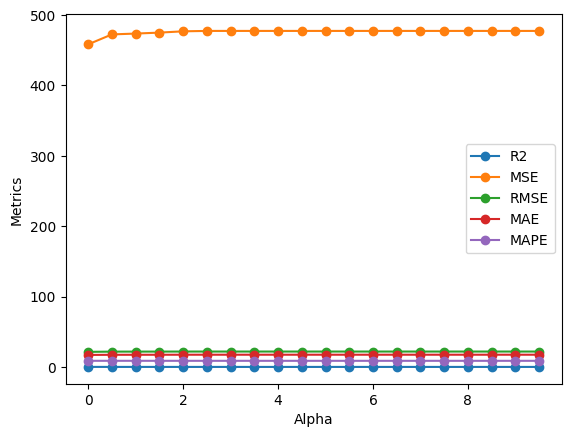

In [75]:
plt.plot(alpha, r2_list_lnr_lasso, marker="o", label="R2")
plt.plot(alpha, mse_list_lnr_lasso, marker="o", label="MSE")
plt.plot(alpha, rmse_list_lnr_lasso, marker="o", label="RMSE")
plt.plot(alpha, mae_list_lnr_lasso, marker="o", label="MAE")
plt.plot(alpha, mape_list_lnr_lasso, marker="o", label="MAPE")
plt.xlabel("Alpha")
plt.ylabel("Metrics")
plt.legend()

In [76]:
#finding best max_iter
max_iter = np.arange(100, 1000, 100)

r2_list_lnr_lasso_maxi= []
mse_list_lnr_lasso_maxi= []
rmse_list_lnr_lasso_maxi= []
mae_list_lnr_lasso_maxi= []
mape_list_lnr_lasso_maxi= []

In [77]:
#defining Linear Regression Lasso model

for i in max_iter:
  lnr_lasso_model = lm.Lasso(alpha=0, max_iter=i)

  #training liner regression model
  lnr_lasso_model.fit(X_training_r,y_training_r)

  #predict data validation
  y_pred_lnr_lasso_maxi = lnr_lasso_model.predict(X_validation_r)

  #metrics
  lnr_lasso_maxi_r2= mt.r2_score(y_validation_r, y_pred_lnr_lasso_maxi)
  lnr_lasso_maxi_mse= mt.mean_squared_error(y_validation_r, y_pred_lnr_lasso_maxi)
  lnr_lasso_maxi_rmse= np.sqrt(lnr_lasso_maxi_mse)
  lnr_lasso_maxi_mae= mt.mean_absolute_error(y_validation_r, y_pred_lnr_lasso_maxi)
  lnr_lasso_maxi_mape= mt.mean_absolute_percentage_error(y_validation_r, y_pred_lnr_lasso_maxi)

  r2_list_lnr_lasso_maxi.append(lnr_lasso_maxi_r2)
  mse_list_lnr_lasso_maxi.append(lnr_lasso_maxi_mse)
  rmse_list_lnr_lasso_maxi.append(lnr_lasso_maxi_rmse)
  mae_list_lnr_lasso_maxi.append(lnr_lasso_maxi_mae)
  mape_list_lnr_lasso_maxi.append(lnr_lasso_maxi_mape)

<ipython-input-77-1d24cac2e16b>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lnr_lasso_model.fit(X_training_r,y_training_r)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-77-1d24ca

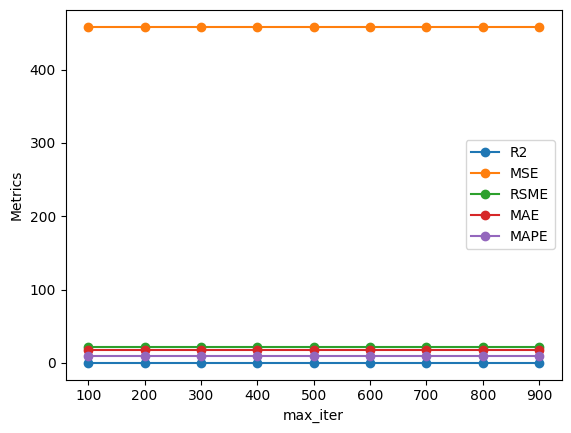

In [78]:
plt.plot(max_iter, r2_list_lnr_lasso_maxi, marker="o", label="R2")
plt.plot(max_iter, mse_list_lnr_lasso_maxi, marker="o", label="MSE")
plt.plot(max_iter, rmse_list_lnr_lasso_maxi, marker="o", label="RSME")
plt.plot(max_iter, mae_list_lnr_lasso_maxi, marker="o", label="MAE")
plt.plot(max_iter, mape_list_lnr_lasso_maxi, marker="o", label="MAPE")
plt.xlabel("max_iter")
plt.ylabel("Metrics")
plt.legend()

d. Linear Regression Lasso Testing

In [79]:
#definig Linear Regression Lasso model
lnr_lasso_model = lm.Lasso(alpha=0, max_iter=100)

#training Linear Regression Lasso model
lnr_lasso_model.fit(np.concatenate((X_training_r, X_validation_r), axis=0), np.concatenate((y_training_r, y_validation_r), axis=0))

#predict data test
y_pred_lnr_lasso_test = lnr_lasso_model.predict(X_test_r)

#metrics
lnr_lasso_r2_test = mt.r2_score(y_test_r, y_pred_lnr_lasso_test)
lnr_lasso_mse_test = mt.mean_squared_error(y_test_r, y_pred_lnr_lasso_test)
lnr_lasso_rmse_test = np.sqrt(lnr_lasso_mse_test)
lnr_lasso_mae_test = mt.mean_absolute_error(y_test_r, y_pred_lnr_lasso_test)
lnr_lasso_mape_test = mt.mean_absolute_percentage_error(y_test_r, y_pred_lnr_lasso_test)

<ipython-input-79-eb50ae02912f>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lnr_lasso_model.fit(np.concatenate((X_training_r, X_validation_r), axis=0), np.concatenate((y_training_r, y_validation_r), axis=0))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.440e+06, tolerance: 7.200e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge

e. Linear Regression Lasso Metrics

In [80]:
#listing metrics to show in table

metrics_lnr_lasso_training = []
metrics_lnr_lasso_validation = []
metrics_lnr_lasso_test = []

metrics_lnr_lasso_training = [lnr_lasso_r2_training,lnr_lasso_mse_training,lnr_lasso_rmse_training, lnr_lasso_mae_training, lnr_lasso_mape_training]
metrics_lnr_lasso_validation = [lnr_lasso_r2_validation,lnr_lasso_mse_validation, lnr_lasso_rmse_validation, lnr_lasso_mae_validation, lnr_lasso_mape_validation]
metrics_lnr_lasso_test = [lnr_lasso_r2_test,lnr_lasso_mse_test, lnr_lasso_rmse_test, lnr_lasso_mae_test, lnr_lasso_mape_test]

##2.2.6 Linear Regression Ridge

a. Linear Regression Ridge Model Training

In [81]:
#defining Linear Regression Ridge model
lnr_ridge_model = lm.Ridge()

#training Linear Regression Ridge model
lnr_ridge_model.fit(X_training_r,y_training_r)

#predict data training
y_pred_lnr_ridge_training = lnr_ridge_model.predict(X_training_r)

#metrics data training
lnr_ridge_r2_training = mt.r2_score(y_training_r, y_pred_lnr_ridge_training)
lnr_ridge_mse_training = mt.mean_squared_error(y_training_r, y_pred_lnr_ridge_training)
lnr_ridge_rmse_training = np.sqrt(lnr_ridge_mse_training)
lnr_ridge_mae_training = mt.mean_absolute_error(y_training_r, y_pred_lnr_ridge_training)
lnr_ridge_mape_training = mt.mean_absolute_percentage_error(y_training_r, y_pred_lnr_ridge_training)

b. Linear Regression Ridge Validation


In [82]:
#predict data validation
y_pred_lnr_ridge_validation = lnr_ridge_model.predict(X_validation_r)

#metrics data validation
lnr_ridge_r2_validation = mt.r2_score(y_validation_r, y_pred_lnr_ridge_validation)
lnr_ridge_mse_validation = mt.mean_squared_error(y_validation_r, y_pred_lnr_ridge_validation)
lnr_ridge_rmse_validation = np.sqrt(lnr_ridge_mse_validation)
lnr_ridge_mae_validation = mt.mean_absolute_error(y_validation_r, y_pred_lnr_ridge_validation)
lnr_ridge_mape_validation = mt.mean_absolute_percentage_error(y_validation_r, y_pred_lnr_ridge_validation)

c. Linear Regression Ridge Hyperparameter Tuning

In [83]:
#finding best alpha
alpha = np.arange(0, 10, 0.5)

r2_list_lnr_ridge = []
mse_list_lnr_ridge = []
rmse_list_lnr_ridge = []
mae_list_lnr_ridge = []
mape_list_lnr_ridge = []

In [84]:
#defining Linear Regression Ridge model

for i in alpha:
  lnr_ridge_model = lm.Ridge(alpha=i)

  #training liner regression model
  lnr_ridge_model.fit(X_training_r,y_training_r)

  #predict data validation
  y_pred_lnr_ridge = lnr_ridge_model.predict(X_validation_r)

  #metrics
  lnr_ridge_r2_= mt.r2_score(y_validation_r, y_pred_lnr_ridge)
  lnr_ridge_mse_= mt.mean_squared_error(y_validation_r, y_pred_lnr_ridge)
  lnr_ridge_rmse_= np.sqrt(lnr_ridge_mse_)
  lnr_ridge_mae_= mt.mean_absolute_error(y_validation_r, y_pred_lnr_ridge)
  lnr_ridge_mape_= mt.mean_absolute_percentage_error(y_validation_r, y_pred_lnr_ridge)

  r2_list_lnr_ridge.append(lnr_ridge_r2_)
  mse_list_lnr_ridge.append(lnr_ridge_mse_)
  rmse_list_lnr_ridge.append(lnr_ridge_rmse_)
  mae_list_lnr_ridge.append(lnr_ridge_mae_)
  mape_list_lnr_ridge.append(lnr_ridge_mape_)

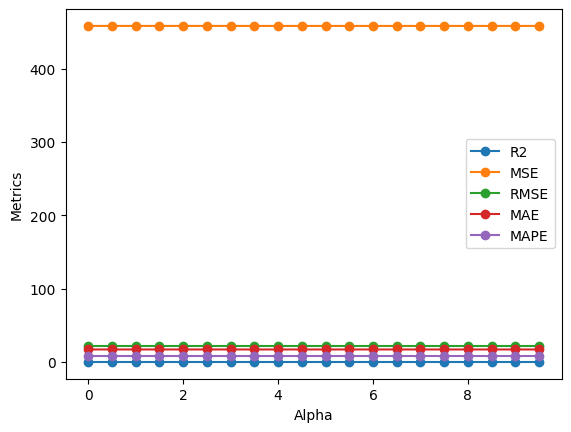

In [85]:
plt.plot(alpha, r2_list_lnr_ridge, marker="o", label="R2")
plt.plot(alpha, mse_list_lnr_ridge, marker="o", label="MSE")
plt.plot(alpha, rmse_list_lnr_ridge, marker="o", label="RMSE")
plt.plot(alpha, mae_list_lnr_ridge, marker="o", label="MAE")
plt.plot(alpha, mape_list_lnr_ridge, marker="o", label="MAPE")
plt.xlabel("Alpha")
plt.ylabel("Metrics")
plt.legend()

In [86]:
#finding best max_iter
max_iter = np.arange(100, 1000, 100)

r2_list_lnr_ridge_maxi= []
mse_list_lnr_ridge_maxi= []
rmse_list_lnr_ridge_maxi= []
mae_list_lnr_ridge_maxi= []
mape_list_lnr_ridge_maxi= []

In [87]:
#defining Linear Regression Ridge model

for i in max_iter:
  lnr_ridge_model = lm.Ridge(alpha=0, max_iter=i)

  #training liner regression model
  lnr_ridge_model.fit(X_training_r,y_training_r)

  #predict data validation
  y_pred_lnr_ridge_maxi = lnr_ridge_model.predict(X_validation_r)

  #metrics
  lnr_ridge_maxi_r2= mt.r2_score(y_validation_r, y_pred_lnr_ridge_maxi)
  lnr_ridge_maxi_mse= mt.mean_squared_error(y_validation_r, y_pred_lnr_ridge_maxi)
  lnr_ridge_maxi_rmse= np.sqrt(lnr_ridge_maxi_mse)
  lnr_ridge_maxi_mae= mt.mean_absolute_error(y_validation_r, y_pred_lnr_ridge_maxi)
  lnr_ridge_maxi_mape= mt.mean_absolute_percentage_error(y_validation_r, y_pred_lnr_ridge_maxi)

  r2_list_lnr_ridge_maxi.append(lnr_ridge_maxi_r2)
  mse_list_lnr_ridge_maxi.append(lnr_ridge_maxi_mse)
  rmse_list_lnr_ridge_maxi.append(lnr_ridge_maxi_rmse)
  mae_list_lnr_ridge_maxi.append(lnr_ridge_maxi_mae)
  mape_list_lnr_ridge_maxi.append(lnr_ridge_maxi_mape)

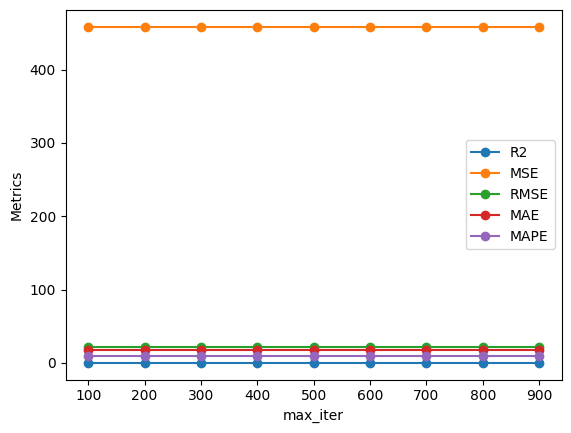

In [88]:
plt.plot(max_iter, r2_list_lnr_ridge_maxi, marker="o", label="R2")
plt.plot(max_iter, mse_list_lnr_ridge_maxi, marker="o", label="MSE")
plt.plot(max_iter, rmse_list_lnr_ridge_maxi, marker="o", label="RMSE")
plt.plot(max_iter, mae_list_lnr_ridge_maxi, marker="o", label="MAE")
plt.plot(max_iter, mape_list_lnr_ridge_maxi, marker="o", label="MAPE")
plt.xlabel("max_iter")
plt.ylabel("Metrics")
plt.legend()

d. Linear Regression Ridge Testing

In [89]:
#definig Linear Regression Ridge model
lnr_ridge_model = lm.Ridge(alpha=0, max_iter=100)

#training Linear Regression Ridge model
lnr_ridge_model.fit(np.concatenate((X_training_r, X_validation_r), axis=0), np.concatenate((y_training_r, y_validation_r), axis=0))

#predict data test
y_pred_lnr_ridge_test = lnr_ridge_model.predict(X_test_r)

#metrics data test
lnr_ridge_r2_test = mt.r2_score(y_test_r, y_pred_lnr_ridge_test)
lnr_ridge_mse_test = mt.mean_squared_error(y_test_r, y_pred_lnr_ridge_test)
lnr_ridge_rmse_test = np.sqrt(lnr_ridge_mse_test)
lnr_ridge_mae_test = mt.mean_absolute_error(y_test_r, y_pred_lnr_ridge_test)
lnr_ridge_mape_test = mt.mean_absolute_percentage_error(y_test_r, y_pred_lnr_ridge_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


e. Linear Regression Ridge Metrics

In [90]:
#listing metrics to show in table

metrics_lnr_ridge_training = []
metrics_lnr_ridge_validation = []
metrics_lnr_ridge_test = []

metrics_lnr_ridge_training = [lnr_ridge_r2_training,lnr_ridge_mse_training,lnr_ridge_rmse_training, lnr_ridge_mae_training, lnr_ridge_mape_training]
metrics_lnr_ridge_validation = [lnr_ridge_r2_validation,lnr_ridge_mse_validation, lnr_ridge_rmse_validation, lnr_ridge_mae_validation, lnr_ridge_mape_validation]
metrics_lnr_ridge_test = [lnr_ridge_r2_test,lnr_ridge_mse_test, lnr_ridge_rmse_test, lnr_ridge_mae_test, lnr_ridge_mape_test]

## 2.2.7 Linear Regression Elastic Net

a. Linear Regression Elastic Net Model Training

In [91]:
#defining Linear Regression Elastic Net model
lnr_elasticnet_model = lm.ElasticNet()

#training Linear Regression Elastic Net model
lnr_elasticnet_model.fit(X_training_r,y_training_r)

#predict data training
y_pred_lnr_elasticnet_training = lnr_elasticnet_model.predict(X_training_r)

#metrics data training
lnr_elasticnet_r2_training = mt.r2_score(y_training_r, y_pred_lnr_elasticnet_training)
lnr_elasticnet_mse_training = mt.mean_squared_error(y_training_r, y_pred_lnr_elasticnet_training)
lnr_elasticnet_rmse_training = np.sqrt(lnr_elasticnet_mse_training)
lnr_elasticnet_mae_training = mt.mean_absolute_error(y_training_r, y_pred_lnr_elasticnet_training)
lnr_elasticnet_mape_training = mt.mean_absolute_percentage_error(y_training_r, y_pred_lnr_elasticnet_training)

b. Linear Regression Elastic Net Validation


In [92]:
#predict data validation
y_pred_lnr_elasticnet_validation = lnr_elasticnet_model.predict(X_validation_r)

#metrics data validation
lnr_elasticnet_r2_validation = mt.r2_score(y_validation_r, y_pred_lnr_elasticnet_validation)
lnr_elasticnet_mse_validation = mt.mean_squared_error(y_validation_r, y_pred_lnr_elasticnet_validation)
lnr_elasticnet_rmse_validation = np.sqrt(lnr_elasticnet_mse_validation)
lnr_elasticnet_mae_validation = mt.mean_absolute_error(y_validation_r, y_pred_lnr_elasticnet_validation)
lnr_elasticnet_mape_validation = mt.mean_absolute_percentage_error(y_validation_r, y_pred_lnr_elasticnet_validation)

c. Linear Regression Elastic Net Hyperparameter Tuning

In [93]:
#finding best alpha
alpha = np.arange(0, 10, 0.5)

r2_list_lnr_elasticnet = []
mse_list_lnr_elasticnet = []
rmse_list_lnr_elasticnet = []
mae_list_lnr_elasticnet = []
mape_list_lnr_elasticnet = []

In [94]:
#defining Linear Regression Elastic Net model

for i in alpha:
  lnr_elasticnet_model = lm.ElasticNet(alpha=i)

  #training liner regression model
  lnr_elasticnet_model.fit(X_training_r,y_training_r)

  #predict data training
  y_pred_lnr_elasticnet = lnr_elasticnet_model.predict(X_validation_r)

  #metrics
  lnr_elasticnet_r2= mt.r2_score(y_validation_r, y_pred_lnr_elasticnet)
  lnr_elasticnet_mse= mt.mean_squared_error(y_validation_r, y_pred_lnr_elasticnet)
  lnr_elasticnet_rmse= np.sqrt(lnr_elasticnet_mse)
  lnr_elasticnet_mae= mt.mean_absolute_error(y_validation_r, y_pred_lnr_elasticnet)
  lnr_elasticnet_mape= mt.mean_absolute_percentage_error(y_validation_r, y_pred_lnr_elasticnet)

  r2_list_lnr_elasticnet.append(lnr_elasticnet_r2)
  mse_list_lnr_elasticnet.append(lnr_elasticnet_mse)
  rmse_list_lnr_elasticnet.append(lnr_elasticnet_rmse)
  mae_list_lnr_elasticnet.append(lnr_elasticnet_mae)
  mape_list_lnr_elasticnet.append(lnr_elasticnet_mape)

<ipython-input-94-5a98575cd139>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lnr_elasticnet_model.fit(X_training_r,y_training_r)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


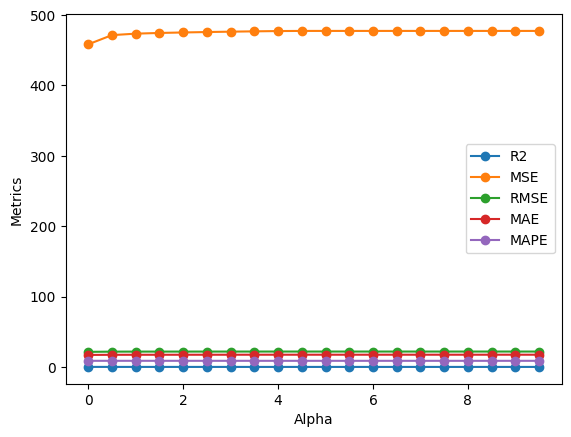

In [95]:
plt.plot(alpha, r2_list_lnr_elasticnet, marker="o", label="R2")
plt.plot(alpha, mse_list_lnr_elasticnet, marker="o", label="MSE")
plt.plot(alpha, rmse_list_lnr_elasticnet, marker="o", label="RMSE")
plt.plot(alpha, mae_list_lnr_elasticnet, marker="o", label="MAE")
plt.plot(alpha, mape_list_lnr_elasticnet, marker="o", label="MAPE")
plt.xlabel("Alpha")
plt.ylabel("Metrics")
plt.legend()

In [96]:
#finding best max_iter
max_iter = np.arange(100, 1000, 100)

r2_list_lnr_elasticnet_maxi= []
mse_list_lnr_elasticnet_maxi= []
rmse_list_lnr_elasticnet_maxi= []
mae_list_lnr_elasticnet_maxi= []
mape_list_lnr_elasticnet_maxi= []

In [97]:
#defining Linear Regression Elastic Net model

for i in max_iter:
  lnr_elasticnet_model = lm.ElasticNet(alpha=0, max_iter=i)

  #training Linear Regression Elastic Net model
  lnr_elasticnet_model.fit(X_training_r,y_training_r)

  #predict data validation
  y_pred_lnr_elasticnet_maxi = lnr_elasticnet_model.predict(X_validation_r)

  #metrics
  lnr_elasticnet_maxi_r2= mt.r2_score(y_validation_r, y_pred_lnr_elasticnet_maxi)
  lnr_elasticnet_maxi_mse= mt.mean_squared_error(y_validation_r, y_pred_lnr_elasticnet_maxi)
  lnr_elasticnet_maxi_rmse= np.sqrt(lnr_elasticnet_maxi_mse)
  lnr_elasticnet_maxi_mae= mt.mean_absolute_error(y_validation_r, y_pred_lnr_elasticnet_maxi)
  lnr_elasticnet_maxi_mape= mt.mean_absolute_percentage_error(y_validation_r, y_pred_lnr_elasticnet_maxi)

  r2_list_lnr_elasticnet_maxi.append(lnr_elasticnet_maxi_r2)
  mse_list_lnr_elasticnet_maxi.append(lnr_elasticnet_maxi_mse)
  rmse_list_lnr_elasticnet_maxi.append(lnr_elasticnet_maxi_rmse)
  mae_list_lnr_elasticnet_maxi.append(lnr_elasticnet_maxi_mae)
  mape_list_lnr_elasticnet_maxi.append(lnr_elasticnet_maxi_mape)

<ipython-input-97-b9c7b2046ccd>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lnr_elasticnet_model.fit(X_training_r,y_training_r)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-97-b

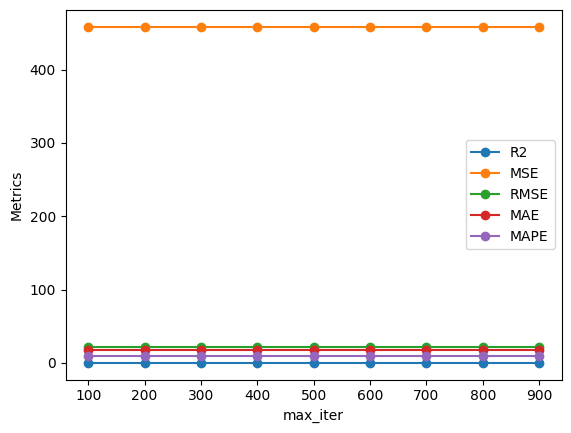

In [98]:
plt.plot(max_iter, r2_list_lnr_elasticnet_maxi, marker="o", label="R2")
plt.plot(max_iter, mse_list_lnr_elasticnet_maxi, marker="o", label="MSE")
plt.plot(max_iter, rmse_list_lnr_elasticnet_maxi, marker="o", label="RMSE")
plt.plot(max_iter, mae_list_lnr_elasticnet_maxi, marker="o", label="MAE")
plt.plot(max_iter, mape_list_lnr_elasticnet_maxi, marker="o", label="MAPE")
plt.xlabel("max_iter")
plt.ylabel("Metrics")
plt.legend()

e. Linear Regression Elastic Net Testing

In [99]:
#definig Linear Regression Elastic Net model
lnr_elasticnet_model = lm.ElasticNet(alpha=0, max_iter=100)

#training Linear Regression Elastic Net model
lnr_elasticnet_model.fit(np.concatenate((X_training_r, X_validation_r), axis=0), np.concatenate((y_training_r, y_validation_r), axis=0))

#predict data test
y_pred_lnr_elasticnet_test = lnr_elasticnet_model.predict(X_test_r)

#metrics data test
lnr_elasticnet_r2_test = mt.r2_score(y_test_r, y_pred_lnr_elasticnet_test)
lnr_elasticnet_mse_test = mt.mean_squared_error(y_test_r, y_pred_lnr_elasticnet_test)
lnr_elasticnet_rmse_test = np.sqrt(lnr_elasticnet_mse_test)
lnr_elasticnet_mae_test = mt.mean_absolute_error(y_test_r, y_pred_lnr_elasticnet_test)
lnr_elasticnet_mape_test = mt.mean_absolute_percentage_error(y_test_r, y_pred_lnr_elasticnet_test)

<ipython-input-99-e9331ff4ae4d>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lnr_elasticnet_model.fit(np.concatenate((X_training_r, X_validation_r), axis=0), np.concatenate((y_training_r, y_validation_r), axis=0))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.440e+06, tolerance: 7.200e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.

e. Linear Regression Elastic Net Metrics

In [100]:
#listing metrics to show in table

metrics_lnr_elasticnet_training = []
metrics_lnr_elasticnet_validation = []
metrics_lnr_elasticnet_test = []

metrics_lnr_elasticnet_training = [lnr_elasticnet_r2_training,lnr_elasticnet_mse_training,lnr_elasticnet_rmse_training, lnr_elasticnet_mae_training, lnr_elasticnet_mape_training]
metrics_lnr_elasticnet_validation = [lnr_elasticnet_r2_validation,lnr_elasticnet_mse_validation, lnr_elasticnet_rmse_validation, lnr_elasticnet_mae_validation, lnr_elasticnet_mape_validation]
metrics_lnr_elasticnet_test = [lnr_elasticnet_r2_test,lnr_elasticnet_mse_test, lnr_elasticnet_rmse_test, lnr_elasticnet_mae_test, lnr_elasticnet_mape_test]

##2.2.8 Poly Regression Lasso

a. Polynomial Regression Lasso Model Training

In [101]:
#defining Polynomial Regression Lasso model
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features_training = poly.fit_transform(X_training_r)
poly_features_validation = poly.fit_transform(X_validation_r)
poly_features_test = poly.fit_transform(X_test_r)

poly_r_lasso_model = lm.Lasso()

#training Polynomial Regression Lasso model
poly_r_lasso_model.fit(poly_features_training, y_training_r)

#predict data training
y_pred_rpoly_lasso_training = poly_r_lasso_model.predict(poly_features_training)

#metrics data training
rpoly_lasso_r2_training = mt.r2_score(y_training_r, y_pred_rpoly_lasso_training)
rpoly_lasso_mse_training = mt.mean_squared_error(y_training_r, y_pred_rpoly_lasso_training)
rpoly_lasso_rmse_training = np.sqrt(rpoly_lasso_mse_training)
rpoly_lasso_mae_training = mt.mean_absolute_error(y_training_r, y_pred_rpoly_lasso_training)
rpoly_lasso_mape_training = mt.mean_absolute_percentage_error(y_training_r, y_pred_rpoly_lasso_training)

b. Polynomial Regression Lasso Validation

In [102]:
#predict data validation
y_pred_rpoly_lasso_validation = poly_r_lasso_model.predict(poly_features_validation)

#metrics data validation
rpoly_lasso_r2_validation = mt.r2_score(y_validation_r, y_pred_rpoly_lasso_validation)
rpoly_lasso_mse_validation = mt.mean_squared_error(y_validation_r, y_pred_rpoly_lasso_validation)
rpoly_lasso_rmse_validation = np.sqrt(rpoly_lasso_mse_validation)
rpoly_lasso_mae_validation = mt.mean_absolute_error(y_validation_r, y_pred_rpoly_lasso_validation)
rpoly_lasso_mape_validation = mt.mean_absolute_percentage_error(y_validation_r, y_pred_rpoly_lasso_validation)

c. Polynomial Regression Lasso Hyperparameter Tuning

In [103]:
#finding best degree
n_degree = np.arange(2, 10, 1)

r2_list_rpoly_lasso = []
mse_list_rpoly_lasso = []
rmse_list_rpoly_lasso = []
mae_list_rpoly_lasso = []
mape_list_rpoly_lasso = []

In [104]:
#defining Polynomial Regression Lasso model

for n in n_degree:
  poly = PolynomialFeatures(degree=n, include_bias=False)
  poly_regression_lasso_model = lm.Lasso()

  #training the polynomial model
  poly_regression_lasso_model.fit(poly_features_training, y_training_r)

  #predict data validation
  y_pred_rpoly_lasso = poly_regression_lasso_model.predict(poly_features_validation)

  #metrics
  rpoly_lasso_r2= mt.r2_score(y_validation_r, y_pred_rpoly_lasso)
  rpoly_lasso_mse= mt.mean_squared_error(y_validation_r, y_pred_rpoly_lasso)
  rpoly_lasso_rmse= np.sqrt(rpoly_lasso_mse)
  rpoly_lasso_mae= mt.mean_absolute_error(y_validation_r, y_pred_rpoly_lasso)
  rpoly_lasso_mape= mt.mean_absolute_percentage_error(y_validation_r, y_pred_rpoly_lasso)

  r2_list_rpoly_lasso.append(rpoly_lasso_r2)
  mse_list_rpoly_lasso.append(rpoly_lasso_mse)
  rmse_list_rpoly_lasso.append(rpoly_lasso_rmse)
  mae_list_rpoly_lasso.append(rpoly_lasso_mae)
  mape_list_rpoly_lasso.append(rpoly_lasso_mape)

In [105]:
# Finding the minimum values and their respective n
min_r2_rpoly_lasso = min(r2_list_rpoly_lasso)
min_r2_n = n_degree[r2_list_rpoly_lasso.index(min_r2_rpoly_lasso)]

min_mse_rpoly_lasso = min(mse_list_rpoly_lasso)
min_mse_n = n_degree[mse_list_rpoly_lasso.index(min_mse_rpoly_lasso)]

min_rmse_rpoly_lasso = min(rmse_list_rpoly_lasso)
min_rmse_n = n_degree[rmse_list_rpoly_lasso.index(min_rmse_rpoly_lasso)]

min_mae_rpoly_lasso = min(mae_list_rpoly_lasso)
min_mae_n = n_degree[mae_list_rpoly_lasso.index(min_mae_rpoly_lasso)]

min_mape_rpoly_lasso = min(mape_list_rpoly_lasso)
min_mape_n = n_degree[mape_list_rpoly_lasso.index(min_mape_rpoly_lasso)]

# Printing the results
print('min R2: {} and n = {}' .format(min_r2_rpoly_lasso, min_r2_n))
print('min MSE: {} and n = {}' .format(min_mse_rpoly_lasso, min_mse_n))
print('min RMSE: {} and n = {}' .format(min_rmse_rpoly_lasso, min_rmse_n))
print('min MAE: {} and n = {}' .format(min_mae_rpoly_lasso, min_mae_n))
print('min MAPE: {} and n = {}' .format(min_mae_rpoly_lasso, min_mae_n))

min R2: 0.009631007774810185 and n = 2
min MSE: 472.91269390919564 and n = 2
min RMSE: 21.746555909136408 and n = 2
min MAE: 17.238378728440562 and n = 2
min MAPE: 17.238378728440562 and n = 2


In [106]:
#finding best alpha
alpha = np.arange(0, 10, 0.5)

r2_list_rpoly_lasso_alpha = []
mse_list_rpoly_lasso_alpha = []
rmse_list_rpoly_lasso_alpha = []
mae_list_rpoly_lasso_alpha = []
mape_list_rpoly_lasso_alpha = []

In [107]:
#defining Polynomial Regression Lasso model

poly = PolynomialFeatures(degree=2, include_bias=False)

for i in alpha:

  poly_regression_lasso_model = lm.Lasso(alpha=i)

  #training liner regression model
  poly_regression_lasso_model.fit(X_training_r,y_training_r)

  #predict data validation
  y_pred_rpoly_lasso_alpha = poly_regression_lasso_model.predict(X_validation_r)

  #metrics
  rpoly_lasso_alpha_r2= mt.r2_score(y_validation_r, y_pred_rpoly_lasso_alpha)
  rpoly_lasso_alpha_mse= mt.mean_squared_error(y_validation_r, y_pred_rpoly_lasso_alpha)
  rpoly_lasso_alpha_rmse= np.sqrt(rpoly_lasso_alpha_mse)
  rpoly_lasso_alpha_mae= mt.mean_absolute_error(y_validation_r, y_pred_rpoly_lasso_alpha)
  rpoly_lasso_alpha_mape= mt.mean_absolute_percentage_error(y_validation_r, y_pred_rpoly_lasso_alpha)

  r2_list_rpoly_lasso_alpha.append(rpoly_lasso_alpha_r2)
  mse_list_rpoly_lasso_alpha.append(rpoly_lasso_alpha_mse)
  rmse_list_rpoly_lasso_alpha.append(rpoly_lasso_alpha_rmse)
  mae_list_rpoly_lasso_alpha.append(rpoly_lasso_alpha_mae)
  mape_list_rpoly_lasso_alpha.append(rpoly_lasso_alpha_mape)

<ipython-input-107-911ea0d6f470>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  poly_regression_lasso_model.fit(X_training_r,y_training_r)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


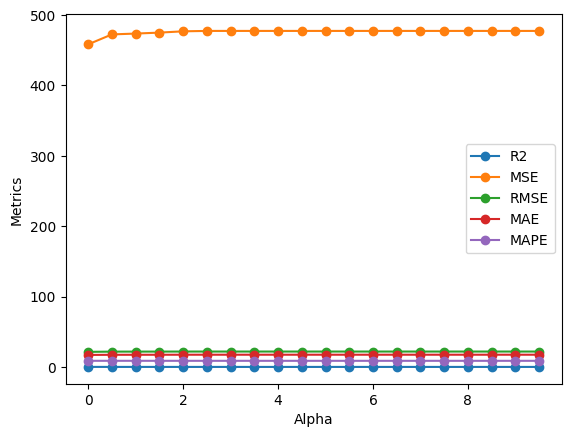

In [108]:
plt.plot(alpha, r2_list_rpoly_lasso_alpha, marker="o", label="R2")
plt.plot(alpha, mse_list_rpoly_lasso_alpha, marker="o", label="MSE")
plt.plot(alpha, rmse_list_rpoly_lasso_alpha, marker="o", label="RMSE")
plt.plot(alpha, mae_list_rpoly_lasso_alpha, marker="o", label="MAE")
plt.plot(alpha, mape_list_rpoly_lasso_alpha, marker="o", label="MAPE")
plt.xlabel("Alpha")
plt.ylabel("Metrics")
plt.legend()

In [109]:
#finding best max_iter
max_iter = np.arange(100, 1000, 100)

r2_list_rpoly_lasso_maxi= []
mse_list_rpoly_lasso_maxi= []
rmse_list_rpoly_lasso_maxi= []
mae_list_rpoly_lasso_maxi= []
mape_list_rpoly_lasso_maxi= []

In [110]:
#defining Polynomial Regression Lasso model

poly = PolynomialFeatures(degree=2, include_bias=False)

for i in max_iter:
  rpoly_lasso_model = lm.Lasso(alpha=0, max_iter=i)

  #training liner regression model
  rpoly_lasso_model.fit(X_training_r,y_training_r)

  #predict data validation
  y_pred_rpoly_lasso_maxi = rpoly_lasso_model.predict(X_validation_r)

  #metrics
  rpoly_lasso_r2_maxi= mt.r2_score(y_validation_r, y_pred_rpoly_lasso_maxi)
  rpoly_lasso_mse_maxi= mt.mean_squared_error(y_validation_r, y_pred_rpoly_lasso_maxi)
  rpoly_lasso_rmse_maxi= np.sqrt(rpoly_lasso_mse_maxi)
  rpoly_lasso_mae_maxi= mt.mean_absolute_error(y_validation_r, y_pred_rpoly_lasso_maxi)
  rpoly_lasso_mape_maxi= mt.mean_absolute_percentage_error(y_validation_r, y_pred_rpoly_lasso_maxi)

  r2_list_rpoly_lasso_maxi.append(rpoly_lasso_r2_maxi)
  mse_list_rpoly_lasso_maxi.append(rpoly_lasso_mse_maxi)
  rmse_list_rpoly_lasso_maxi.append(rpoly_lasso_rmse_maxi)
  mae_list_rpoly_lasso_maxi.append(rpoly_lasso_mae_maxi)
  mape_list_rpoly_lasso_maxi.append(rpoly_lasso_mape_maxi)

<ipython-input-110-1428b4cdd59d>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  rpoly_lasso_model.fit(X_training_r,y_training_r)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-110-14

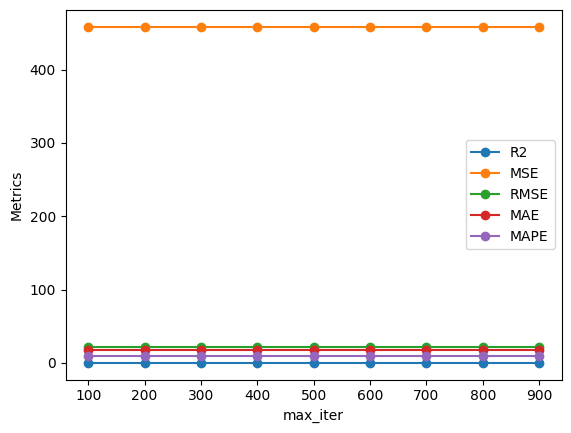

In [111]:
plt.plot(max_iter, r2_list_rpoly_lasso_maxi, marker="o", label="R2")
plt.plot(max_iter, mse_list_rpoly_lasso_maxi, marker="o", label="MSE")
plt.plot(max_iter, rmse_list_rpoly_lasso_maxi, marker="o", label="RMSE")
plt.plot(max_iter, mae_list_rpoly_lasso_maxi, marker="o", label="MAE")
plt.plot(max_iter, mape_list_rpoly_lasso_maxi, marker="o", label="MAPE")
plt.xlabel("max_iter")
plt.ylabel("Metrics")
plt.legend()

d. Polynomial Regression Lasso Testing

In [112]:
#defining Polynomial Regression Lasso model
poly = PolynomialFeatures(degree=2, include_bias=False)
rpoly_lasso_model = lm.Lasso(alpha=0, max_iter=100)

#training the Polynomial Regression Lasso model
rpoly_lasso_model.fit(np.concatenate((poly_features_training, poly_features_validation), axis=0), np.concatenate((y_training_r, y_validation_r), axis=0))

#predict data test
y_pred_rpoly_lasso_test = rpoly_lasso_model.predict(poly_features_test)

#metrics data test
rpoly_lasso_r2_test = mt.r2_score(y_test_r, y_pred_rpoly_lasso_test)
rpoly_lasso_mse_test = mt.mean_squared_error(y_test_r, y_pred_rpoly_lasso_test)
rpoly_lasso_rmse_test = np.sqrt(rpoly_lasso_mse_test)
rpoly_lasso_mae_test = mt.mean_absolute_error(y_test_r, y_pred_rpoly_lasso_test)
rpoly_lasso_mape_test = mt.mean_absolute_percentage_error(y_test_r, y_pred_rpoly_lasso_test)

<ipython-input-112-b1d5b52c9135>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  rpoly_lasso_model.fit(np.concatenate((poly_features_training, poly_features_validation), axis=0), np.concatenate((y_training_r, y_validation_r), axis=0))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.286e+06, tolerance: 7.200e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in skl

e. Polynomial Regression Lasso Metrics

In [113]:
#listing metrics to show in table

metrics_rpoly_lasso_training = []
metrics_rpoly_lasso_validation = []
metrics_rpoly_lasso_test = []

#listing metrics to show in table
metrics_rpoly_lasso_training = [rpoly_lasso_r2_training,rpoly_lasso_mse_training,rpoly_lasso_rmse_training, rpoly_lasso_mae_training, rpoly_lasso_mape_training]
metrics_rpoly_lasso_validation = [rpoly_lasso_r2_validation,rpoly_lasso_mse_validation, rpoly_lasso_rmse_validation, rpoly_lasso_mae_validation, rpoly_lasso_mape_validation]
metrics_rpoly_lasso_test = [rpoly_lasso_r2_test,rpoly_lasso_mse_test, rpoly_lasso_rmse_test, rpoly_lasso_mae_test, rpoly_lasso_mape_test]

##2.2.9 Poly Regression Ridge

a. Polynomial Regression Ridge Model Training

In [114]:
#defining Polynomial Regression Ridge model
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features_training = poly.fit_transform(X_training_r)
poly_features_validation = poly.fit_transform(X_validation_r)
poly_features_test = poly.fit_transform(X_test_r)

rpoly_ridge_model = lm.Ridge()

#training Polynomial Regression Ridge model
rpoly_ridge_model.fit(poly_features_training, y_training_r)

#predict data training
y_pred_rpoly_ridge_training = rpoly_ridge_model.predict(poly_features_training)

#metrics data training
rpoly_ridge_r2_training = mt.r2_score(y_training_r, y_pred_rpoly_ridge_training)
rpoly_ridge_mse_training = mt.mean_squared_error(y_training_r, y_pred_rpoly_ridge_training)
rpoly_ridge_rmse_training = np.sqrt(rpoly_ridge_mse_training)
rpoly_ridge_mae_training = mt.mean_absolute_error(y_training_r, y_pred_rpoly_ridge_training)
rpoly_ridge_mape_training = mt.mean_absolute_percentage_error(y_training_r, y_pred_rpoly_ridge_training)

b. Polynomial Regression Ridge Validation

In [115]:
#predict data validation
y_pred_rpoly_ridge_validation = rpoly_ridge_model.predict(poly_features_validation)

#metrics data validation
rpoly_ridge_r2_validation = mt.r2_score(y_validation_r, y_pred_rpoly_ridge_validation)
rpoly_ridge_mse_validation = mt.mean_squared_error(y_validation_r, y_pred_rpoly_ridge_validation)
rpoly_ridge_rmse_validation = np.sqrt(rpoly_ridge_mse_validation)
rpoly_ridge_mae_validation = mt.mean_absolute_error(y_validation_r, y_pred_rpoly_ridge_validation)
rpoly_ridge_mape_validation = mt.mean_absolute_percentage_error(y_validation_r, y_pred_rpoly_ridge_validation)

c. Polynomial Regression Ridge Hyperparameter Tuning

In [116]:
#finding best degree
n_degree = np.arange(2, 10, 1)

r2_list_rpoly_ridge = []
mse_list_rpoly_ridge = []
rmse_list_rpoly_ridge = []
mae_list_rpoly_ridge = []
mape_list_rpoly_ridge = []

In [117]:
#defining Polynomial Regression Ridge model

for n in n_degree:
  poly = PolynomialFeatures(degree=n, include_bias=False)
  rpoly_ridge_model = lm.Ridge()

  #training the polynomial model
  rpoly_ridge_model.fit(poly_features_training, y_training_r)

  #predict data validation
  y_pred_rpoly_ridge = rpoly_ridge_model.predict(poly_features_validation)

  #metrics
  rpoly_ridge_r2= mt.r2_score(y_validation_r, y_pred_rpoly_ridge)
  rpoly_ridge_mse= mt.mean_squared_error(y_validation_r, y_pred_rpoly_ridge)
  rpoly_ridge_rmse= np.sqrt(rpoly_ridge_mse)
  rpoly_ridge_mae= mt.mean_absolute_error(y_validation_r, y_pred_rpoly_ridge)
  rpoly_ridge_mape= mt.mean_absolute_percentage_error(y_validation_r, y_pred_rpoly_ridge)

  r2_list_rpoly_ridge.append(rpoly_ridge_r2)
  mse_list_rpoly_ridge.append(rpoly_ridge_mse)
  rmse_list_rpoly_ridge.append(rpoly_ridge_rmse)
  mae_list_rpoly_ridge.append(rpoly_ridge_mae)
  mape_list_rpoly_ridge.append(rpoly_ridge_mape)

In [118]:
# Finding the minimum values and their respective n
min_r2_rpoly = min(r2_list_rpoly_ridge)
min_r2_n = n_degree[r2_list_rpoly_ridge.index(min_r2_rpoly)]

min_mse_rpoly = min(mse_list_rpoly_ridge)
min_mse_n = n_degree[mse_list_rpoly_ridge.index(min_mse_rpoly)]

min_rmse_rpoly = min(rmse_list_rpoly_ridge)
min_rmse_n = n_degree[rmse_list_rpoly_ridge.index(min_rmse_rpoly)]

min_mae_rpoly = min(mae_list_rpoly_ridge)
min_mae_n = n_degree[mae_list_rpoly_ridge.index(min_mae_rpoly)]

min_mape_rpoly = min(mape_list_rpoly_ridge)
min_mape_n = n_degree[mape_list_rpoly_ridge.index(min_mape_rpoly)]

# Printing the results
print('min R2: {} and n = {}' .format(min_r2_rpoly, min_r2_n))
print('min MSE: {} and n = {}' .format(min_mse_rpoly, min_mse_n))
print('min RMSE: {} and n = {}' .format(min_rmse_rpoly, min_rmse_n))
print('min MAE: {} and n = {}' .format(min_mae_rpoly, min_mae_n))
print('min MAPE: {} and n = {}' .format(min_mae_rpoly, min_mae_n))

min R2: 0.06769929966791699 and n = 2
min MSE: 445.18441024375704 and n = 2
min RMSE: 21.09939359895817 and n = 2
min MAE: 16.738740611690588 and n = 2
min MAPE: 16.738740611690588 and n = 2


In [119]:
#finding best alpha
alpha = np.arange(0, 10, 0.5)

r2_list_rpoly_ridge_alpha = []
mse_list_rpoly_ridge_alpha = []
rmse_list_rpoly_ridge_alpha = []
mae_list_rpoly_ridge_alpha = []
mape_list_rpoly_ridge_alpha = []

In [120]:
#defining Polynomial Regression Ridge model

poly = PolynomialFeatures(degree=2, include_bias=False)

for i in alpha:

  rpoly_ridge_model = lm.Ridge(alpha=i)

  #training liner regression model
  rpoly_ridge_model.fit(X_training_r,y_training_r)

  #predict data validation
  y_pred_rpoly_ridge_alpha = rpoly_ridge_model.predict(X_validation_r)

  #metrics
  rpoly_ridge_r2_alpha= mt.r2_score(y_validation_r, y_pred_rpoly_ridge_alpha)
  rpoly_ridge_mse_alpha= mt.mean_squared_error(y_validation_r, y_pred_rpoly_ridge_alpha)
  rpoly_ridge_rmse_alpha= np.sqrt(rpoly_ridge_mse_alpha)
  rpoly_ridge_mae_alpha= mt.mean_absolute_error(y_validation_r, y_pred_rpoly_ridge_alpha)
  rpoly_ridge_mape_alpha= mt.mean_absolute_percentage_error(y_validation_r, y_pred_rpoly_ridge_alpha)

  r2_list_rpoly_ridge_alpha.append(rpoly_ridge_r2_alpha)
  mse_list_rpoly_ridge_alpha.append(rpoly_ridge_mse_alpha)
  rmse_list_rpoly_ridge_alpha.append(rpoly_ridge_rmse_alpha)
  mae_list_rpoly_ridge_alpha.append(rpoly_ridge_mae_alpha)
  mape_list_rpoly_ridge_alpha.append(rpoly_ridge_mape_alpha)

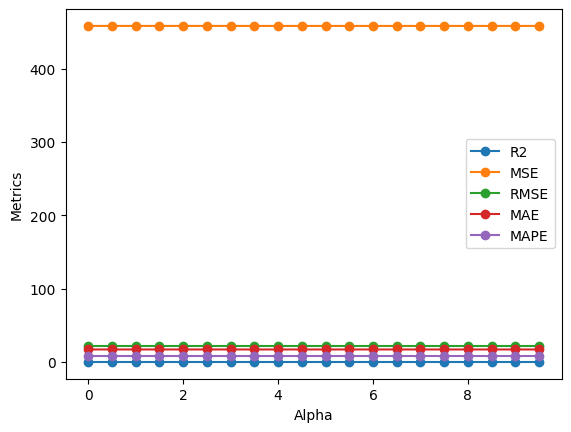

In [121]:
plt.plot(alpha, r2_list_rpoly_ridge_alpha, marker="o", label="R2")
plt.plot(alpha, mse_list_rpoly_ridge_alpha, marker="o", label="MSE")
plt.plot(alpha, rmse_list_rpoly_ridge_alpha, marker="o", label="RMSE")
plt.plot(alpha, mae_list_rpoly_ridge_alpha, marker="o", label="MAE")
plt.plot(alpha, mape_list_rpoly_ridge_alpha, marker="o", label="MAPE")
plt.xlabel("Alpha")
plt.ylabel("Metrics")
plt.legend()

In [122]:
#finding best max_iter
max_iter = np.arange(100, 1000, 100)

r2_list_rpoly_ridge_maxi= []
mse_list_rpoly_ridge_maxi= []
rmse_list_rpoly_ridge_maxi= []
mae_list_rpoly_ridge_maxi= []
mape_list_rpoly_ridge_maxi= []

In [123]:
#defining Polynomial Regression Ridge model

poly = PolynomialFeatures(degree=2, include_bias=False)

for i in max_iter:
  rpoly_ridge_model = lm.Ridge(alpha=0, max_iter=i)

  #training liner regression model
  rpoly_ridge_model.fit(X_training_r,y_training_r)

  #predict data validation
  y_pred_rpoly_ridge_maxi = rpoly_ridge_model.predict(X_validation_r)

  #metrics
  rpoly_ridge_r2_maxi= mt.r2_score(y_validation_r, y_pred_rpoly_ridge_maxi)
  rpoly_ridge_mse_maxi= mt.mean_squared_error(y_validation_r, y_pred_rpoly_ridge_maxi)
  rpoly_ridge_rmse_maxi= np.sqrt(rpoly_ridge_mse_maxi)
  rpoly_ridge_mae_maxi= mt.mean_absolute_error(y_validation_r, y_pred_rpoly_ridge_maxi)
  rpoly_ridge_mape_maxi= mt.mean_absolute_percentage_error(y_validation_r, y_pred_rpoly_ridge_maxi)

  r2_list_rpoly_ridge_maxi.append(rpoly_ridge_r2_maxi)
  mse_list_rpoly_ridge_maxi.append(rpoly_ridge_mse_maxi)
  rmse_list_rpoly_ridge_maxi.append(rpoly_ridge_rmse_maxi)
  mae_list_rpoly_ridge_maxi.append(rpoly_ridge_mae_maxi)
  mape_list_rpoly_ridge_maxi.append(rpoly_ridge_mape_maxi)

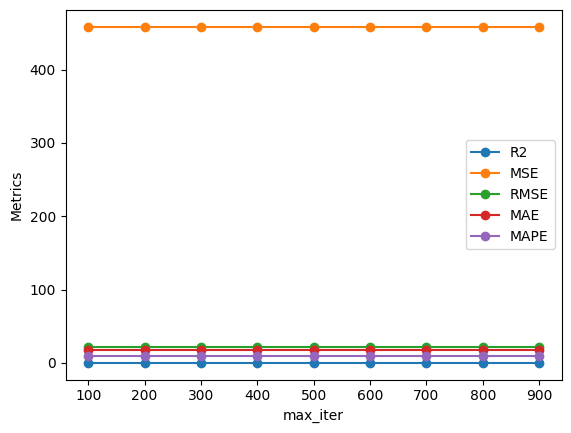

In [124]:
plt.plot(max_iter, r2_list_rpoly_ridge_maxi, marker="o", label="R2")
plt.plot(max_iter, mse_list_rpoly_ridge_maxi, marker="o", label="MSE")
plt.plot(max_iter, rmse_list_rpoly_ridge_maxi, marker="o", label="RMSE")
plt.plot(max_iter, mae_list_rpoly_ridge_maxi, marker="o", label="MAE")
plt.plot(max_iter, mape_list_rpoly_ridge_maxi, marker="o", label="MAPE")
plt.xlabel("max_iter")
plt.ylabel("Metrics")
plt.legend()

d. Polynomial Regression Ridge Testing

In [125]:
#defining Polynomial Regression Ridge model
poly = PolynomialFeatures(degree=2, include_bias=False)
rpoly_ridge_model = lm.Ridge(alpha=0, max_iter=100)

#training Polynomial Regression Ridge model
rpoly_ridge_model.fit(np.concatenate((poly_features_training, poly_features_validation), axis=0), np.concatenate((y_training_r, y_validation_r), axis=0))

#predict data test
y_pred_rpoly_ridge_test = rpoly_ridge_model.predict(poly_features_test)

#metrics data test
rpoly_ridge_r2_test = mt.r2_score(y_test_r, y_pred_rpoly_ridge_test)
rpoly_ridge_mse_test = mt.mean_squared_error(y_test_r, y_pred_rpoly_ridge_test)
rpoly_ridge_rmse_test = np.sqrt(rpoly_ridge_mse_test)
rpoly_ridge_mae_test = mt.mean_absolute_error(y_test_r, y_pred_rpoly_ridge_test)
rpoly_ridge_mape_test = mt.mean_absolute_percentage_error(y_test_r, y_pred_rpoly_ridge_test)

e. Polynomial Regression Ridge Metrics

In [126]:
#listing metrics to show in table

metrics_rpoly_ridge_training = []
metrics_rpoly_ridge_validation = []
metrics_rpoly_ridge_test = []

#listing metrics to show in table
metrics_rpoly_ridge_training = [rpoly_ridge_r2_training,rpoly_ridge_mse_training,rpoly_ridge_rmse_training, rpoly_ridge_mae_training, rpoly_ridge_mape_training]
metrics_rpoly_ridge_validation = [rpoly_ridge_r2_validation,rpoly_ridge_mse_validation, rpoly_ridge_rmse_validation, rpoly_ridge_mae_validation, rpoly_ridge_mape_validation]
metrics_rpoly_ridge_test = [rpoly_ridge_r2_test,rpoly_ridge_mse_test, rpoly_ridge_rmse_test, rpoly_ridge_mae_test, rpoly_ridge_mape_test]

##2.2.10 Poly Regression Elastic Net

a. Polynomial Regression Elastic Net Model Training

In [127]:
#defining polynomial model
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features_training = poly.fit_transform(X_training_r)
poly_features_validation = poly.fit_transform(X_validation_r)
poly_features_test = poly.fit_transform(X_test_r)

rpoly_elasticnet_model = lm.ElasticNet()

#training the polynomial model
rpoly_elasticnet_model.fit(poly_features_training, y_training_r)

#predict data training
y_pred_rpoly_elasticnet_training = rpoly_elasticnet_model.predict(poly_features_training)

#metrics data training
rpoly_elasticnet_r2_training = mt.r2_score(y_training_r, y_pred_rpoly_elasticnet_training)
rpoly_elasticnet_mse_training = mt.mean_squared_error(y_training_r, y_pred_rpoly_elasticnet_training)
rpoly_elasticnet_rmse_training = np.sqrt(rpoly_elasticnet_mse_training)
rpoly_elasticnet_mae_training = mt.mean_absolute_error(y_training_r, y_pred_rpoly_elasticnet_training)
rpoly_elasticnet_mape_training = mt.mean_absolute_percentage_error(y_training_r, y_pred_rpoly_elasticnet_training)

b. Polynomial Regression Elastic Net Validation

In [128]:
#predict data validation
y_pred_rpoly_elasticnet_validation = rpoly_elasticnet_model.predict(poly_features_validation)

#metrics data validation
rpoly_elasticnet_r2_validation = mt.r2_score(y_validation_r, y_pred_rpoly_elasticnet_validation)
rpoly_elasticnet_mse_validation = mt.mean_squared_error(y_validation_r, y_pred_rpoly_elasticnet_validation)
rpoly_elasticnet_rmse_validation = np.sqrt(rpoly_elasticnet_mse_validation)
rpoly_elasticnet_mae_validation = mt.mean_absolute_error(y_validation_r, y_pred_rpoly_elasticnet_validation)
rpoly_elasticnet_mape_validation = mt.mean_absolute_percentage_error(y_validation_r, y_pred_rpoly_elasticnet_validation)

c. Polynomial Regression Elastic Net Hyperparameter Tuning

In [129]:
#finding best degree
n_degree = np.arange(2, 10, 1)

r2_list_rpoly_elasticnet = []
mse_list_rpoly_elasticnet = []
rmse_list_rpoly_elasticnet = []
mae_list_rpoly_elasticnet = []
mape_list_rpoly_elasticnet = []

In [130]:
#defining Polynomial Regression Elastic Net model

for n in n_degree:
  poly = PolynomialFeatures(degree=n, include_bias=False)
  rpoly_elasticnet_model = lm.ElasticNet()

  #training Polynomial Regression Elastic Net model
  rpoly_elasticnet_model.fit(poly_features_training, y_training_r)

  #predict data training
  y_pred_rpoly_elasticnet = rpoly_elasticnet_model.predict(poly_features_validation)

  #metrics
  rpoly_elasticnet_r2= mt.r2_score(y_validation_r, y_pred_rpoly_elasticnet)
  rpoly_elasticnet_mse= mt.mean_squared_error(y_validation_r, y_pred_rpoly_elasticnet)
  rpoly_elasticnet_rmse= np.sqrt(rpoly_elasticnet_mse)
  rpoly_elasticnet_mae= mt.mean_absolute_error(y_validation_r, y_pred_rpoly_elasticnet)
  rpoly_elasticnet_mape= mt.mean_absolute_percentage_error(y_validation_r, y_pred_rpoly_elasticnet)

  r2_list_rpoly_elasticnet.append(rpoly_elasticnet_r2)
  mse_list_rpoly_elasticnet.append(rpoly_elasticnet_mse)
  rmse_list_rpoly_elasticnet.append(rpoly_elasticnet_rmse)
  mae_list_rpoly_elasticnet.append(rpoly_elasticnet_mae)
  mape_list_rpoly_elasticnet.append(rpoly_elasticnet_mape)

In [131]:
# Finding the minimum values and their respective n
min_r2_rpoly = min(r2_list_rpoly_elasticnet)
min_r2_n = n_degree[r2_list_rpoly_elasticnet.index(min_r2_rpoly)]

min_mse_rpoly = min(mse_list_rpoly_elasticnet)
min_mse_n = n_degree[mse_list_rpoly_elasticnet.index(min_mse_rpoly)]

min_rmse_rpoly = min(rmse_list_rpoly_elasticnet)
min_rmse_n = n_degree[rmse_list_rpoly_elasticnet.index(min_rmse_rpoly)]

min_mae_rpoly = min(mae_list_rpoly_elasticnet)
min_mae_n = n_degree[mae_list_rpoly_elasticnet.index(min_mae_rpoly)]

min_mape_rpoly = min(mape_list_rpoly_elasticnet)
min_mape_n = n_degree[mape_list_rpoly_elasticnet.index(min_mape_rpoly)]

# Printing the results
print('min R2: {} and n = {}' .format(min_r2_rpoly, min_r2_n))
print('min MSE: {} and n = {}' .format(min_mse_rpoly, min_mse_n))
print('min RMSE: {} and n = {}' .format(min_rmse_rpoly, min_rmse_n))
print('min MAE: {} and n = {}' .format(min_mae_rpoly, min_mae_n))
print('min MAPE: {} and n = {}' .format(min_mae_rpoly, min_mae_n))

min R2: 0.012781775822342856 and n = 2
min MSE: 471.4081655799173 and n = 2
min RMSE: 21.711936016392396 and n = 2
min MAE: 17.19996619878308 and n = 2
min MAPE: 17.19996619878308 and n = 2


In [132]:
#finding best alpha
alpha = np.arange(0, 10, 0.5)

r2_list_rpoly_elasticnet_alpha = []
mse_list_rpoly_elasticnet_alpha = []
rmse_list_rpoly_elasticnet_alpha = []
mae_list_rpoly_elasticnet_alpha = []
mape_list_rpoly_elasticnet_alpha = []

In [133]:
#defining Polynomial Regression Elastic Net model

poly = PolynomialFeatures(degree=2, include_bias=False)

for i in alpha:

  rpoly_elasticnet_model = lm.ElasticNet(alpha=i)

  #training Polynomial Regression Elastic Net model
  rpoly_elasticnet_model.fit(X_training_r,y_training_r)

  #predict data validation
  y_pred_rpoly_elasticnet_alpha = rpoly_elasticnet_model.predict(X_validation_r)

  #metrics
  rpoly_elasticnet_r2_alpha= mt.r2_score(y_validation_r, y_pred_rpoly_elasticnet_alpha)
  rpoly_elasticnet_mse_alpha= mt.mean_squared_error(y_validation_r, y_pred_rpoly_elasticnet_alpha)
  rpoly_elasticnet_rmse_alpha= np.sqrt(rpoly_elasticnet_mse_alpha)
  rpoly_elasticnet_mae_alpha= mt.mean_absolute_error(y_validation_r, y_pred_rpoly_elasticnet_alpha)
  rpoly_elasticnet_mape_alpha= mt.mean_absolute_percentage_error(y_validation_r, y_pred_rpoly_elasticnet_alpha)

  r2_list_rpoly_elasticnet_alpha.append(rpoly_elasticnet_r2_alpha)
  mse_list_rpoly_elasticnet_alpha.append(rpoly_elasticnet_mse_alpha)
  rmse_list_rpoly_elasticnet_alpha.append(rpoly_elasticnet_rmse_alpha)
  mae_list_rpoly_elasticnet_alpha.append(rpoly_elasticnet_mae_alpha)
  mape_list_rpoly_elasticnet_alpha.append(rpoly_elasticnet_mape_alpha)

<ipython-input-133-88053c5011f1>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  rpoly_elasticnet_model.fit(X_training_r,y_training_r)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


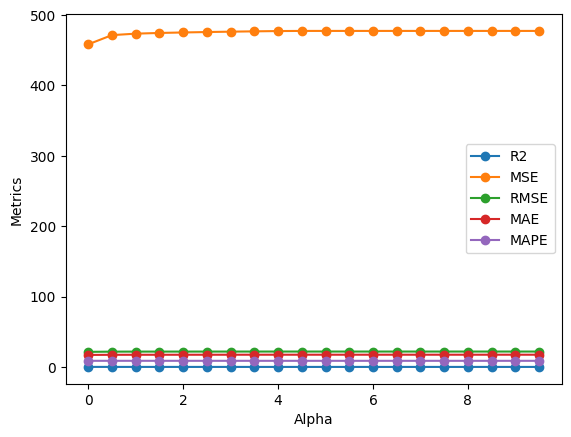

In [134]:
plt.plot(alpha, r2_list_rpoly_elasticnet_alpha, marker="o", label="R2")
plt.plot(alpha, mse_list_rpoly_elasticnet_alpha, marker="o", label="MSE")
plt.plot(alpha, rmse_list_rpoly_elasticnet_alpha, marker="o", label="RMSE")
plt.plot(alpha, mae_list_rpoly_elasticnet_alpha, marker="o", label="MAE")
plt.plot(alpha, mape_list_rpoly_elasticnet_alpha, marker="o", label="MAPE")
plt.xlabel("Alpha")
plt.ylabel("Metrics")
plt.legend()

In [135]:
#finding best max_iter
max_iter = np.arange(100, 1000, 100)

r2_list_rpoly_elasticnet_maxi= []
mse_list_rpoly_elasticnet_maxi= []
rmse_list_rpoly_elasticnet_maxi= []
mae_list_rpoly_elasticnet_maxi= []
mape_list_rpoly_elasticnet_maxi= []

In [136]:
#defining _alpha model

poly = PolynomialFeatures(degree=2, include_bias=False)

for i in max_iter:
  rpoly_elasticnet_model = lm.ElasticNet(alpha=0, max_iter=i)

  #training _alpha model
  rpoly_elasticnet_model.fit(X_training_r,y_training_r)

  #predict data validation
  y_pred_rpoly_elasticnet_maxi = rpoly_elasticnet_model.predict(X_validation_r)

  #metrics
  rpoly_elasticnet_r2_maxi= mt.r2_score(y_validation_r, y_pred_rpoly_elasticnet_maxi)
  rpoly_elasticnet_mse_maxi= mt.mean_squared_error(y_validation_r, y_pred_rpoly_elasticnet_maxi)
  rpoly_elasticnet_rmse_maxi= np.sqrt(rpoly_elasticnet_mse_maxi)
  rpoly_elasticnet_mae_maxi= mt.mean_absolute_error(y_validation_r, y_pred_rpoly_elasticnet_maxi)
  rpoly_elasticnet_mape_maxi= mt.mean_absolute_percentage_error(y_validation_r, y_pred_rpoly_elasticnet_maxi)

  r2_list_rpoly_elasticnet_maxi.append(rpoly_elasticnet_r2_maxi)
  mse_list_rpoly_elasticnet_maxi.append(rpoly_elasticnet_mse_maxi)
  rmse_list_rpoly_elasticnet_maxi.append(rpoly_elasticnet_rmse_maxi)
  mae_list_rpoly_elasticnet_maxi.append(rpoly_elasticnet_mae_maxi)
  mape_list_rpoly_elasticnet_maxi.append(rpoly_elasticnet_mape_maxi)

<ipython-input-136-0842c486a917>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  rpoly_elasticnet_model.fit(X_training_r,y_training_r)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e+06, tolerance: 5.042e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-1

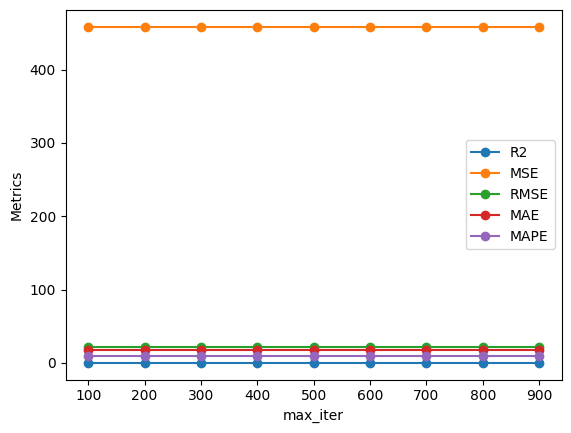

In [137]:
plt.plot(max_iter, r2_list_rpoly_elasticnet_maxi, marker="o", label="R2")
plt.plot(max_iter, mse_list_rpoly_elasticnet_maxi, marker="o", label="MSE")
plt.plot(max_iter, rmse_list_rpoly_elasticnet_maxi, marker="o", label="RMSE")
plt.plot(max_iter, mae_list_rpoly_elasticnet_maxi, marker="o", label="MAE")
plt.plot(max_iter, mape_list_rpoly_elasticnet_maxi, marker="o", label="MAPE")
plt.xlabel("max_iter")
plt.ylabel("Metrics")
plt.legend()

d. Polynomial Regression Elastic Net Testing

In [138]:
#defining Polynomial Regression Elastic Net model
poly = PolynomialFeatures(degree=2, include_bias=False)
rpoly_elasticnet_model = lm.ElasticNet(alpha=0, max_iter=100)

#training Polynomial Regression Elastic Net model
rpoly_elasticnet_model.fit(np.concatenate((poly_features_training, poly_features_validation), axis=0), np.concatenate((y_training_r, y_validation_r), axis=0))

#predict data test
y_pred_rpoly_elasticnet_test = rpoly_elasticnet_model.predict(poly_features_test)

#metrics data test
rpoly_elasticnet_r2_test = mt.r2_score(y_test_r, y_pred_rpoly_elasticnet_test)
rpoly_elasticnet_mse_test = mt.mean_squared_error(y_test_r, y_pred_rpoly_elasticnet_test)
rpoly_elasticnet_rmse_test = np.sqrt(rpoly_elasticnet_mse_test)
rpoly_elasticnet_mae_test = mt.mean_absolute_error(y_test_r, y_pred_rpoly_elasticnet_test)
rpoly_elasticnet_mape_test = mt.mean_absolute_percentage_error(y_test_r, y_pred_rpoly_elasticnet_test)

<ipython-input-138-18e24f400114>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  rpoly_elasticnet_model.fit(np.concatenate((poly_features_training, poly_features_validation), axis=0), np.concatenate((y_training_r, y_validation_r), axis=0))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.286e+06, tolerance: 7.200e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented i

e. Polynomial Regression Elastic Net Metrics

In [139]:
#listing metrics to show in table

metrics_rpoly_elasticnet_training = []
metrics_rpoly_elasticnet_validation = []
metrics_rpoly_elasticnet_test = []

#listing metrics to show in table
metrics_rpoly_elasticnet_training = [rpoly_elasticnet_r2_training,rpoly_elasticnet_mse_training,rpoly_elasticnet_rmse_training, rpoly_elasticnet_mae_training, rpoly_elasticnet_mape_training]
metrics_rpoly_elasticnet_validation = [rpoly_elasticnet_r2_validation,rpoly_elasticnet_mse_validation, rpoly_elasticnet_rmse_validation, rpoly_elasticnet_mae_validation, rpoly_elasticnet_mape_validation]
metrics_rpoly_elasticnet_test = [rpoly_elasticnet_r2_test,rpoly_elasticnet_mse_test, rpoly_elasticnet_rmse_test, rpoly_elasticnet_mae_test, rpoly_elasticnet_mape_test]

#2.3 Clustering

##2.3.1 Kmeans

a. Kmeans Model Training

In [140]:
#defining Kmeans Model

kmeans_model = ct.KMeans(
          init='random',
          random_state=0
)

#training and predicting Kmeans Model
kmeans_clusters = kmeans_model.fit_predict(X_dataset_c)

#Kmeans Metrics
ss_kmeans_training = mt.silhouette_score(X_dataset_c,kmeans_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


b. Kmeans Hyperparameter Tuning

In [141]:
n_clusters = np.arange(2, 20, 1)
ss_kmeans_list = []

In [142]:
#defining Kmeans Model
for n in n_clusters:
  kmeans_model = ct.KMeans(
      init='random',
      n_clusters = n,
      random_state=0
)

  #training and predicting Kmeans Model
  kmeans_clusters_tuning= kmeans_model.fit_predict(X_dataset_c)

  ss_kmeans_tuning = mt.silhouette_score(X_dataset_c,kmeans_clusters_tuning)
  ss_kmeans_list.append(ss_kmeans_tuning)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [143]:
max_ss_kmeans = max(ss_kmeans_list)
kmeans_n_clusters = n_clusters[ss_kmeans_list.index(max_ss_kmeans)]

# Printing the results
print('max_ss: {} and n = {}' .format(max_ss_kmeans, kmeans_n_clusters))

max_ss: 0.23295918228054466 and n = 3


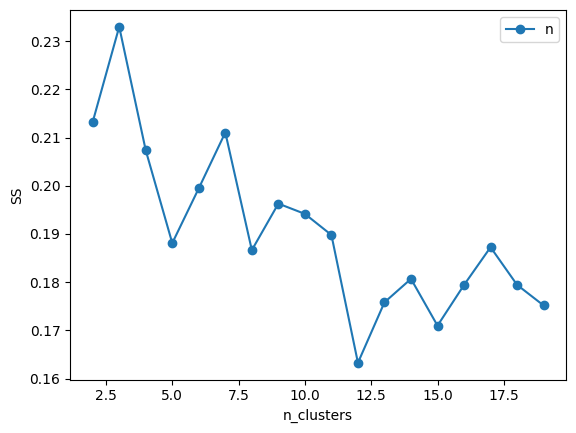

In [144]:
plt.plot(n_clusters, ss_kmeans_list, marker="o", label="n")
plt.xlabel("n_clusters")
plt.ylabel("SS")
plt.legend()

c. Kmeans Best Model

In [145]:
#defining Kmeans Model

kmeans_model = ct.KMeans(
          n_clusters=3,
          init='random',
          random_state=0
)

#training and predicting Kmeans Model
kmeans_best_n_clusters = kmeans_model.fit_predict(X_dataset_c)

#Kmeans Metrics
ss_kmeans = mt.silhouette_score(X_dataset_c,kmeans_best_n_clusters)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


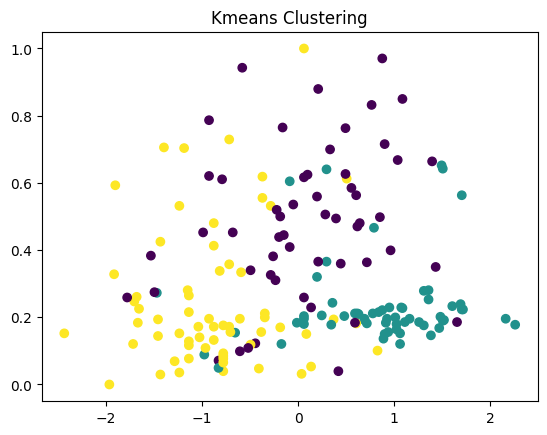

In [146]:
#show kmeans clusters
fig = plt.figure()
plt.title( 'Kmeans Clustering' )
plt.scatter(X_dataset_c.iloc[:,0], X_dataset_c.iloc[:,1], c=kmeans_best_n_clusters)


d. Kmens Metrics

In [147]:
metrics_kmeans = [kmeans_n_clusters, ss_kmeans]

##2.3.2 Affinity Propagation

a. Affinity Propagation Training

In [148]:
#defining Affinity Propagation Model
affinity_propagation_model = ct.AffinityPropagation()

#training and predicting Affinity Propagation Model
labels_affinity = affinity_propagation_model.fit_predict( X_dataset_c)

#metrics Affinity Propagation Training
ss_affinity = mt.silhouette_score(X_dataset_c,labels_affinity)
n_labels = len(np.unique(labels_affinity))

print('ss_affinity: {} and n_labels = {}'.format(ss_affinity, n_labels))

ss_affinity: 0.1693882248493382 and n_labels = 17


In [149]:
X_dataset_c.shape

(178, 13)

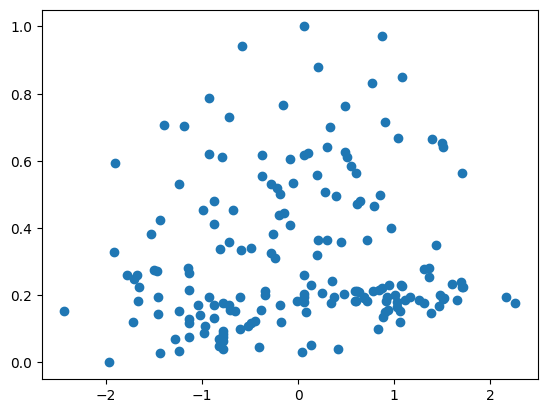

In [150]:
#ploting X_dataset_c
plt.scatter(X_dataset_c.iloc[:, 0], X_dataset_c.iloc[:, 1])

b. Affinity Propagation Hyperparameter Tuning

In [151]:
preference = np.arange(-300, -10, 10)
ss_affinity_list = []
num_clusters_list = []
preference_list = []

In [152]:
#defining Affinity Propagation Model
for i in preference:
  affinity_propagation_model = ct.AffinityPropagation(preference= i)
  preference_list.append(i)

  #training and predicting Affinity Model
  affinityp_labels = affinity_propagation_model.fit_predict(X_dataset_c)

  #number of labels
  num_clusters = len(np.unique(affinityp_labels))
  num_clusters_list.append(num_clusters)

  #affinity metrics
  ss_affinity = mt.silhouette_score(X_dataset_c, affinityp_labels)
  ss_affinity_list.append(ss_affinity)


In [153]:
#finding best preference
max_ss_affinity = max(ss_affinity_list)
n_labels_affinity = num_clusters_list[ss_affinity_list.index(max_ss_affinity)]
preference_affinity = preference_list[ss_affinity_list.index(max_ss_affinity)]

#printing results
print('max_ss: {}, n_labels = {} and preference = {}'.format(max_ss_affinity, n_labels_affinity, preference_affinity))

max_ss: 0.2238198554645042, n_labels = 3 and preference = -210


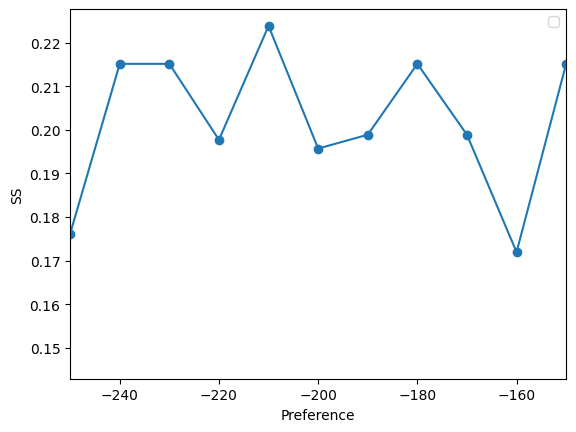

In [154]:
plt.plot(preference, ss_affinity_list,marker="o")
plt.xlabel("Preference")
plt.ylabel("SS")

plt.xlim(-250, -150)

plt.legend()

c. Affinity Propagation Best Model

In [155]:
#defining Affinity Propagation Model
affinity_propagation_model = ct.AffinityPropagation(preference=-210)

#training and predicting Affinity Propagation Model
labels_affinity = affinity_propagation_model.fit_predict( X_dataset_c)

#Affinity Propagation Best Model metrics
ss_affinity_propagation = mt.silhouette_score(X_dataset_c,labels_affinity)
n_labels = len(np.unique(labels_affinity))

print('ss_affinity_propagation: {} and n_labels = {}'.format(ss_affinity_propagation, n_labels))

ss_affinity_propagation: 0.2238198554645042 and n_labels = 3


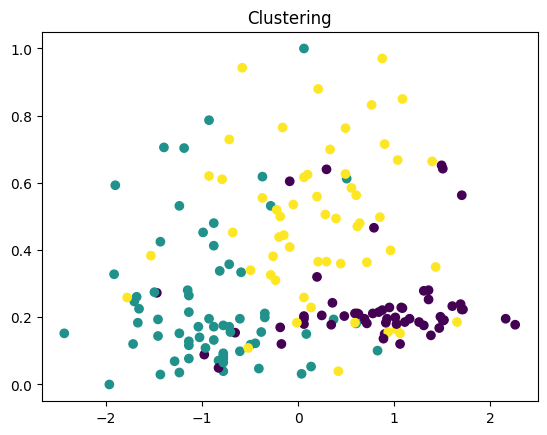

In [156]:
#show clusters
fig = plt.figure()
plt.title( 'Clustering' )
plt.scatter(X_dataset_c.iloc[:,0], X_dataset_c.iloc[:,1], c=labels_affinity)

d. Affinity Propagation Metrics

In [157]:
metrics_affinityp = [n_labels, ss_affinity_propagation]

#4.0 Metrics Visualization

##4.1 Classification  

In [158]:
data_training = [metrics_knn_training, metrics_dt_training, metrics_rf_training, metrics_lgr_training]
data_validation = [metrics_knn_validation, metrics_dt_validation, metrics_rf_validation, metrics_lgr_validation]
data_test = [metrics_knn_test, metrics_dt_test, metrics_rf_test, metrics_lgr_test]

# Define the index and columns
index = pd.Index(['KNN', 'Decision Tree', 'Random Forest','Logistic Regression'], name='Algorithm')
columns = pd.Index(['Accuracy', 'Precision', 'Recall', 'F1 Score'])
pd.options.display.float_format = '{:.3f}'.format


In [159]:
# Create the DataFrame
data_metrics_training = pd.DataFrame(data_training, index=index, columns=columns).reset_index()
data_metrics_training.index = data_metrics_training.index + 1
data_metrics_training

,Algorithm,Accuracy,Precision,Recall,F1 Score
1,KNN,0.782,0.756,0.733,0.744
2,Decision Tree,1.000,1.000,1.000,1.000
3,Random Forest,1.000,1.000,1.000,1.000
4,Logistic Regression,0.567,0.000,0.000,0.000


In [160]:
# Create the DataFrame
data_metrics_validation = pd.DataFrame(data_validation, index=index, columns=columns).reset_index()
data_metrics_validation.index = data_metrics_validation.index + 1
data_metrics_validation

,Algorithm,Accuracy,Precision,Recall,F1 Score
1,KNN,0.676,0.632,0.603,0.617
2,Decision Tree,0.946,0.936,0.939,0.938
3,Random Forest,0.965,0.974,0.944,0.958
4,Logistic Regression,0.567,0.000,0.000,0.000


In [161]:
# Create the DataFrame
data_metrics_test = pd.DataFrame(data_test, index=index, columns=columns).reset_index()
data_metrics_test.index = data_metrics_test.index + 1
data_metrics_test

,Algorithm,Accuracy,Precision,Recall,F1 Score
1,KNN,0.688,0.648,0.635,0.642
2,Decision Tree,0.948,0.941,0.940,0.940
3,Random Forest,0.965,0.974,0.945,0.959
4,Logistic Regression,0.872,0.868,0.835,0.851


###4.2 Regression

In [171]:
data_training_r = [metrics_lnr_training, metrics_lnr_lasso_training, metrics_lnr_ridge_training, metrics_lnr_elasticnet_training, metrics_dtr_training, metrics_rfr_training, metrics_rpoly_training, metrics_rpoly_lasso_training, metrics_rpoly_ridge_training, metrics_rpoly_elasticnet_training]
data_validation_r = [metrics_lnr_validation, metrics_lnr_lasso_validation, metrics_lnr_ridge_validation, metrics_lnr_elasticnet_validation, metrics_dtr_validation, metrics_rfr_validation, metrics_rpoly_validation, metrics_rpoly_lasso_validation, metrics_rpoly_ridge_validation, metrics_rpoly_elasticnet_validation]
data_test_r = [metrics_lnr_validation, metrics_lnr_lasso_test, metrics_lnr_ridge_test, metrics_lnr_elasticnet_test, metrics_dtr_test, metrics_rfr_test, metrics_rpoly_test, metrics_rpoly_lasso_test, metrics_rpoly_ridge_test, metrics_rpoly_elasticnet_test]

# Define the index and columns
index = pd.Index(['Linear Regression', 'Linear Regression Lasso', 'Lineaar Regression Ridge','Linear Regression Elastic Net','Decicion Tree Regressor', 'Random Forest Regressor', 'Polynmial Regression', 'Polynmial Regression Lasso', 'Polynmial Regression Ridge','Polynmial Regression Elastic Net'], name='Algorithm')
columns = pd.Index(['R2', 'MSE', 'RMSE', 'MAE', 'MAPE'])
pd.options.display.float_format = '{:.3f}'.format

In [172]:
# Create the DataFrame
data_metrics_training_r = pd.DataFrame(data_training_r, index=index, columns=columns).reset_index()
data_metrics_training_r.index = data_metrics_training_r.index + 1
data_metrics_training_r

,Algorithm,R2,MSE,RMSE,MAE,MAPE
1,Linear Regression,0.046,455.996,21.354,16.998,8.653
2,Linear Regression Lasso,0.007,474.475,21.782,17.305,8.737
3,Lineaar Regression Ridge,0.046,455.996,21.354,16.998,8.653
4,Linear Regression Elastic Net,0.008,474.269,21.778,17.300,8.732
5,Decicion Tree Regressor,0.992,3.940,1.985,0.214,0.083
6,Random Forest Regressor,0.903,46.455,6.816,4.861,2.578
7,Polynmial Regression,0.094,432.986,20.808,16.458,8.351
8,Polynmial Regression Lasso,0.009,473.639,21.763,17.285,8.700
9,Polynmial Regression Ridge,0.093,433.475,20.820,16.472,8.373
10,Polynmial Regression Elastic Net,0.013,471.878,21.723,17.244,8.679


In [164]:
# Create the DataFrame
data_metrics_validation_r = pd.DataFrame(data_validation_r, index=index, columns=columns). reset_index()
data_metrics_validation_r.index = data_metrics_validation_r.index + 1
data_metrics_validation_r

,Algorithm,R2,MSE,RMSE,MAE,MAPE
1,Linear Regression,0.040,458.447,21.411,17.040,8.683
2,Linear Regression Lasso,0.008,473.747,21.766,17.265,8.696
3,Lineaar Regression Ridge,0.040,458.445,21.411,17.039,8.682
4,Linear Regression Elastic Net,0.008,473.636,21.763,17.263,8.694
5,Decicion Tree Regressor,-0.297,619.382,24.887,17.093,7.106
6,Random Forest Regressor,0.335,317.478,17.818,13.002,7.031
7,Polynmial Regression,0.066,445.768,21.113,16.750,8.548
8,Polynmial Regression Lasso,0.010,472.913,21.747,17.238,8.682
9,Polynmial Regression Ridge,0.068,445.184,21.099,16.739,8.569
10,Polynmial Regression Elastic Net,0.013,471.408,21.712,17.200,8.675


In [165]:
# Create the DataFrame
data_metrics_test_r = pd.DataFrame(data_test_r, index=index, columns=columns).reset_index()
data_metrics_test_r.index = data_metrics_test_r.index + 1
data_metrics_test_r

,Algorithm,R2,MSE,RMSE,MAE,MAPE
1,Linear Regression,0.040,458.447,21.411,17.040,8.683
2,Linear Regression Lasso,0.051,461.988,21.494,17.144,8.531
3,Lineaar Regression Ridge,0.051,461.988,21.494,17.144,8.531
4,Linear Regression Elastic Net,0.051,461.988,21.494,17.144,8.531
5,Decicion Tree Regressor,0.090,442.848,24.887,16.830,7.883
6,Random Forest Regressor,0.404,290.123,17.818,12.225,6.344
7,Polynmial Regression,0.091,442.641,21.039,16.736,8.277
8,Polynmial Regression Lasso,0.089,443.505,21.060,16.751,8.350
9,Polynmial Regression Ridge,0.091,442.647,21.039,16.736,8.277
10,Polynmial Regression Elastic Net,0.089,443.505,21.060,16.751,8.350


###4.3 Clustering

In [166]:
data_clustering = [metrics_kmeans, metrics_affinityp]

# Define the index and columns
index = pd.Index(['Kmeans', 'Affinity Propagation'], name='Algorithm')
columns = pd.Index(['Clusters', 'Silhouette Score'])
pd.options.display.float_format = '{:.3f}'.format

In [167]:
# Create the DataFrame to clusterizaation
data_metrics_cluster = pd.DataFrame(data_clustering, index=index, columns=columns).reset_index()
data_metrics_cluster.index = data_metrics_cluster.index + 1
data_metrics_cluster

,Algorithm,Clusters,Silhouette Score
1,Kmeans,3,0.233
2,Affinity Propagation,3,0.224
